Data: 

1) From 23 Dec 2020 to current: 
https://epiforecasts.io/covid/posts/national/united-states/ 

2) Before that: https://rt.live/


## Get the datasets and do some data cleaning

### Effective Reproduction dataset from epiforecast

In [ ]:
import pandas as pd
import numpy as np
import datetime 
import matplotlib.pyplot as plt
import seaborn as sb

In [ ]:
!pip install us

     |████████████████████████████████| 133kB 7.6MB/s 
  Created wheel for us: filename=us-2.0.2-cp37-none-any.whl size=11929 sha256=ff24da375069b21597678bb32fd56773cdb931f8578ab1dfb9b8026552e0e5e5
  Stored in directory: /root/.cache/pip/wheels/e2/16/45/6453383ffa495670f0f6b80a3e697a9771d98cfbaf8b451e73
  Created wheel for jellyfish: filename=jellyfish-0.6.1-cp37-cp37m-linux_x86_64.whl size=72165 sha256=6a78dad38cd6976b720a08bd55fc69a5527b984a53e235d9c659624a9c42627e
  Stored in directory: /root/.cache/pip/wheels/9c/6f/33/92bb9a4b4562a60ba6a80cedbab8907e48bc7a8b1f369ea0ae
Successfully built us jellyfish


In [ ]:
import us # this is so that we can easily convert states and state codes

In [ ]:
df1 = pd.read_csv("/content/drive/MyDrive/CZ1115introDSAI/Reproduction Rate/rt_epiforecast.csv")
df1.head()

,state,date,strat,type,median,mean,sd,lower_90,lower_50,lower_20,upper_20,upper_50,upper_90
0,Alabama,2020-12-23,NaN,estimate,0.930981,0.960596,0.101041,0.850935,0.900854,0.916099,0.952307,1.001944,1.146368
1,Alabama,2020-12-24,NaN,estimate,0.932155,0.958066,0.093153,0.852542,0.901378,0.916838,0.953545,0.998427,1.130443
2,Alabama,2020-12-25,NaN,estimate,0.932148,0.955463,0.086013,0.856701,0.901694,0.917109,0.952829,0.995651,1.116509
3,Alabama,2020-12-26,NaN,estimate,0.932176,0.952809,0.079629,0.860315,0.901882,0.917252,0.951839,0.992309,1.099856
4,Alabama,2020-12-27,NaN,estimate,0.931248,0.950129,0.073963,0.861933,0.902059,0.917286,0.950655,0.988048,1.087212


In [ ]:
# convert the date column to datetime object
df1["date"] = pd.to_datetime(df1["date"])
df1["date"] = df1["date"].dt.date

In [ ]:
df1["date"].iloc[0]

datetime.date(2020, 12, 23)

In [ ]:
df1.head()

,state,date,strat,type,median,mean,sd,lower_90,lower_50,lower_20,upper_20,upper_50,upper_90
0,Alabama,2020-12-23,NaN,estimate,0.930981,0.960596,0.101041,0.850935,0.900854,0.916099,0.952307,1.001944,1.146368
1,Alabama,2020-12-24,NaN,estimate,0.932155,0.958066,0.093153,0.852542,0.901378,0.916838,0.953545,0.998427,1.130443
2,Alabama,2020-12-25,NaN,estimate,0.932148,0.955463,0.086013,0.856701,0.901694,0.917109,0.952829,0.995651,1.116509
3,Alabama,2020-12-26,NaN,estimate,0.932176,0.952809,0.079629,0.860315,0.901882,0.917252,0.951839,0.992309,1.099856
4,Alabama,2020-12-27,NaN,estimate,0.931248,0.950129,0.073963,0.861933,0.902059,0.917286,0.950655,0.988048,1.087212


In [ ]:
print("Total number of data points:\t", len(df1))
print("Data starts on             :\t", min(df1["date"]))
print("Data ends on               :\t", max(df1["date"]))

Total number of data points:	 6984
Data starts on             :	 2020-12-23
Data ends on               :	 2021-04-28


**Here we can see that data from epiforecast run from 23 Dec 2020 into the future (28 April 2021).** 

In [ ]:
df1.type.unique()

array(['estimate', 'estimate based on partial data', 'forecast'],
      dtype=object)

In [ ]:
# only choose the data that is estimated on full data, and some relevant column
df1_estimate = df1[df1["type"]=="estimate"]

In [ ]:
print("Number of Rt estimated on full data:\t", len(df1_estimate))

Number of Rt estimated on full data:	 5609


In [ ]:
# only choose the column state, date, median, mean, sd, upper_90 and lower_90 (90% confidence interval)
df1_selected = pd.DataFrame(df1_estimate[["state", "date", "median", "mean", "sd", "upper_90", "lower_90"]])

In [ ]:
df1_selected.head()

,state,date,median,mean,sd,upper_90,lower_90
0,Alabama,2020-12-23,0.930981,0.960596,0.101041,1.146368,0.850935
1,Alabama,2020-12-24,0.932155,0.958066,0.093153,1.130443,0.852542
2,Alabama,2020-12-25,0.932148,0.955463,0.086013,1.116509,0.856701
3,Alabama,2020-12-26,0.932176,0.952809,0.079629,1.099856,0.860315
4,Alabama,2020-12-27,0.931248,0.950129,0.073963,1.087212,0.861933


In [ ]:
print("Selected total number of data points:\t", len(df1_selected))
print("Selected data starts on             :\t", min(df1_selected["date"]))
print("Selected data ends on               :\t", max(df1_selected["date"]))

Selected total number of data points:	 5609
Selected data starts on             :	 2020-12-23
Selected data ends on               :	 2021-04-03


In [ ]:
df1_notestimate = df1[df1["type"]!="estimate"]
print("Not selected data earliest date             :\t", min(df1_notestimate["date"]))
print("Not selected data latest date               :\t", max(df1_notestimate["date"]))

Not selected data earliest date             :	 2021-04-04
Not selected data latest date               :	 2021-04-28


This shows us that the data from 04 April onwards (more recent data) are either estimated from partial data, or totally forecast. Since our main dataset, CovidTracking data ends on 07 March, it is totally fine to only get data uptil 03 April.

In [ ]:
df1_selected["state_code"] = df1_selected["state"].apply(lambda x: us.states.lookup(x).abbr)
df1_selected.head() 

,state,date,median,mean,sd,upper_90,lower_90,state_code
0,Alabama,2020-12-23,0.930981,0.960596,0.101041,1.146368,0.850935,AL
1,Alabama,2020-12-24,0.932155,0.958066,0.093153,1.130443,0.852542,AL
2,Alabama,2020-12-25,0.932148,0.955463,0.086013,1.116509,0.856701,AL
3,Alabama,2020-12-26,0.932176,0.952809,0.079629,1.099856,0.860315,AL
4,Alabama,2020-12-27,0.931248,0.950129,0.073963,1.087212,0.861933,AL


In [ ]:
df1_selected.columns

Index(['state', 'date', 'median', 'mean', 'sd', 'upper_90', 'lower_90',
       'state_code'],
      dtype='object')

In [ ]:
# change order of the columns for easier reference
df1_selected = df1_selected[['state', 'state_code', 'date', 'median', 'mean', 'sd', 'upper_90', 'lower_90']]

In [ ]:
df1_selected.head()

,state,state_code,date,median,mean,sd,upper_90,lower_90
0,Alabama,AL,2020-12-23,0.930981,0.960596,0.101041,1.146368,0.850935
1,Alabama,AL,2020-12-24,0.932155,0.958066,0.093153,1.130443,0.852542
2,Alabama,AL,2020-12-25,0.932148,0.955463,0.086013,1.116509,0.856701
3,Alabama,AL,2020-12-26,0.932176,0.952809,0.079629,1.099856,0.860315
4,Alabama,AL,2020-12-27,0.931248,0.950129,0.073963,1.087212,0.861933


In [ ]:
# save this data for analysis later
df1_selected.to_csv("/content/drive/MyDrive/CZ1115introDSAI/Reproduction Rate/rt_epiforecast_selected.csv", index=False)

### Effective Reproduction dataset from rt.live

In [ ]:
df2 = pd.read_csv("/content/drive/MyDrive/CZ1115introDSAI/Reproduction Rate/rt_rtlive.csv")
df2.head()

,date,region,index,mean,median,lower_80,upper_80,infections,test_adjusted_positive,test_adjusted_positive_raw,positive,tests,new_tests,new_cases,new_deaths
0,2020-03-02,ME,0,1.353815,1.347229,1.135023,1.538081,68.719357,0.0,0.0,0.0,0.0,NaN,NaN,NaN
1,2020-03-03,ME,1,1.347466,1.339570,1.127512,1.514020,0.666405,0.0,0.0,0.0,0.0,NaN,NaN,NaN
2,2020-03-04,ME,2,1.343113,1.336660,1.130994,1.502090,9.447788,0.0,0.0,0.0,0.0,NaN,NaN,NaN
3,2020-03-05,ME,3,1.338407,1.334258,1.129211,1.480786,17.922689,0.0,0.0,0.0,0.0,NaN,NaN,NaN
4,2020-03-06,ME,4,1.330090,1.329534,1.152407,1.486668,19.268179,0.0,0.0,0.0,0.0,NaN,NaN,NaN


In [ ]:
df2["date"] = pd.to_datetime(df2["date"])
df2["date"] = df2["date"].dt.date

In [ ]:
df2["date"].iloc[0]

datetime.date(2020, 3, 2)

In [ ]:
print("Total number of data points:\t", len(df2))
print("Data starts on             :\t", min(df2["date"]))
print("Data ends on               :\t", max(df2["date"]))

Total number of data points:	 17096
Data starts on             :	 2020-01-09
Data ends on               :	 2021-01-26


**Here we can see that data from rt.live runs from 09 Jan 2020 to 26 Jan 2021**

In [ ]:
# only choose the column date, region, mean, median, lower_80, upper_80 (80% confidence interval)
df2_selected = pd.DataFrame(df2[["region", "date", "median", "mean", "upper_80", "lower_80"]])

In [ ]:
df2_selected.rename(columns={"region":"state_code"}, inplace=True)

In [ ]:
df2_selected.head()

,state_code,date,median,mean,upper_80,lower_80
0,ME,2020-03-02,1.347229,1.353815,1.538081,1.135023
1,ME,2020-03-03,1.339570,1.347466,1.514020,1.127512
2,ME,2020-03-04,1.336660,1.343113,1.502090,1.130994
3,ME,2020-03-05,1.334258,1.338407,1.480786,1.129211
4,ME,2020-03-06,1.329534,1.330090,1.486668,1.152407


In [ ]:
df2_selected["state"] = df2_selected["state_code"].apply(lambda x: us.states.lookup(x).name)
df2_selected.head()

,state_code,date,median,mean,upper_80,lower_80,state
0,ME,2020-03-02,1.347229,1.353815,1.538081,1.135023,Maine
1,ME,2020-03-03,1.339570,1.347466,1.514020,1.127512,Maine
2,ME,2020-03-04,1.336660,1.343113,1.502090,1.130994,Maine
3,ME,2020-03-05,1.334258,1.338407,1.480786,1.129211,Maine
4,ME,2020-03-06,1.329534,1.330090,1.486668,1.152407,Maine


In [ ]:
df2_selected.columns

Index(['state_code', 'date', 'median', 'mean', 'upper_80', 'lower_80',
       'state'],
      dtype='object')

In [ ]:
# change order of the columns for easier reference
df2_selected = df2_selected[['state', 'state_code', 'date', 'median', 'mean', 'upper_80', 'lower_80']]

In [ ]:
df2_selected.head()

,state,state_code,date,median,mean,upper_80,lower_80
0,Maine,ME,2020-03-02,1.347229,1.353815,1.538081,1.135023
1,Maine,ME,2020-03-03,1.339570,1.347466,1.514020,1.127512
2,Maine,ME,2020-03-04,1.336660,1.343113,1.502090,1.130994
3,Maine,ME,2020-03-05,1.334258,1.338407,1.480786,1.129211
4,Maine,ME,2020-03-06,1.329534,1.330090,1.486668,1.152407


In [ ]:
df2_selected.to_csv("/content/drive/MyDrive/CZ1115introDSAI/Reproduction Rate/rt_rtlive_selected.csv", index=False)

### Information about 2020 Lockdown from March to May

In [ ]:
x = pd.read_html("https://en.wikipedia.org/wiki/U.S._state_and_local_government_responses_to_the_COVID-19_pandemic")

In [ ]:
df_info_SHO = x[1]
df_info_SHO

State/territory  ...                         Sources
                     State/territory  ...                         Sources
0                            Alabama  ...           [7][8][9][10][11][12]
1                             Alaska  ...             [13][9][14][10][11]
2                     American Samoa  ...                    [15][16][17]
3                            Arizona  ...         [18][9][19][10][11][12]
4                           Arkansas  ...         [20][9][21][10][11][12]
5   California (government response)  ...            [22][23][10][11][12]
6                           Colorado  ...             [9][24][10][11][12]
7                        Connecticut  ...             [9][25][10][11][12]
8                           Delaware  ...     [26][9][27][28][10][11][12]
9               District of Columbia  ...            [29][30][10][11][12]
10                           Florida  ...             [9][31][10][11][12]
11                           Georgia  ...                 [9][10][11][12]
12                              Guam  ...                            [32]
13                            Hawaii  ...             [9][33][34][10][11]
14                             Idaho  ...     [9][35][36][10][11][37][12]
15                          Illinois  ...         [9][38][39][10][11][12]
16                           Indiana  ...     [9][10][11][12][40][41][42]
17                              Iowa  ...         [9][43][10][11][44][12]
18                            Kansas  ...             [9][45][10][11][12]
19                          Kentucky  ...         [9][10][11][12][46][47]
20                         Louisiana  ...     [9][10][11][12][48][49][50]
21                             Maine  ...                 [9][10][11][12]
22                          Maryland  ...         [9][51][52][10][11][12]
23                     Massachusetts  ...         [9][53][54][10][11][12]
24                          Michigan  ...         [9][55][56][10][11][12]
25                         Minnesota  ...         [9][10][11][12][57][42]
26                       Mississippi  ...         [9][58][59][10][11][12]
27                          Missouri  ...             [9][60][10][11][12]
28                           Montana  ...             [9][61][10][11][12]
29                          Nebraska  ...                 [9][10][11][12]
30                            Nevada  ...             [9][62][10][11][12]
31                     New Hampshire  ...             [9][63][10][11][12]
32                        New Jersey  ...         [9][64][65][10][11][12]
33                        New Mexico  ...         [9][66][67][10][11][12]
34                          New York  ...         [9][68][69][10][11][12]
35                    North Carolina  ...         [9][70][71][10][11][12]
36                      North Dakota  ...                 [9][10][11][12]
37                N. Mariana Islands  ...                        [72][10]
38                              Ohio  ...         [9][10][11][12][73][42]
39                          Oklahoma  ...         [9][74][10][11][75][12]
40                            Oregon  ...     [9][76][77][10][11][12][78]
41                      Pennsylvania  ...         [9][79][80][10][11][12]
42                       Puerto Rico  ...                            [81]
43                      Rhode Island  ...             [9][82][10][11][12]
44                    South Carolina  ...             [9][83][10][11][12]
45                      South Dakota  ...         [9][84][85][10][11][12]
46                         Tennessee  ...         [9][86][87][10][11][12]
47                             Texas  ...         [9][10][11][88][89][12]
48                              Utah  ...             [9][90][10][11][12]
49               U.S. Virgin Islands  ...                            [91]
50                           Vermont  ...     [9][92][93][10][94][11][12]
51                          Virginia  ...     [9][10][11][12][95][96][97]
52                       

Clean up the column name to remove the multi-level columns

In [ ]:
type(df_info_SHO.columns)

pandas.core.indexes.multi.MultiIndex

In [ ]:
new_col_names = []
for col in df_info_SHO.columns.values:
  if col[0] != "Closures ordered":
    col_name = col[1]
  else:
    col_name = "Closures " + col[1]

  if col_name == "State/territory.1":
    col_name = "State_code"
  elif col_name[-3:] == "[6]":
    col_name = col_name[:-3] 

  col_name = col_name.lower()
  col_name = col_name.replace(" ", "_")

  new_col_names.append(col_name)

print(new_col_names)

['state/territory', 'state_code', 'state_of_emergency_declared', 'stay_at_home_ordered', 'face_coverings_required_in_public', 'gatherings_banned', 'out-of-state_travel_restrictions', 'closures_schools', 'closures_daycares', 'closures_bars_&_sit-down_restaurants', 'closures_non-essential_retail', 'sources']


In [ ]:
df_info_SHO.columns = new_col_names

In [ ]:
df_info_SHO

,state/territory,state_code,state_of_emergency_declared,stay_at_home_ordered,face_coverings_required_in_public,gatherings_banned,out-of-state_travel_restrictions,closures_schools,closures_daycares,closures_bars_&_sit-down_restaurants,closures_non-essential_retail,sources
0,Alabama,Alabama,March 13,April 4,Yes,10 or more,No,Yes (remainder of term),Yes,Yes,Yes,[7][8][9][10][11][12]
1,Alaska,Alaska,March 11,March 28,No,10 or more,Mandatory quarantine,Yes (remainder of term),Yes,Yes,Yes,[13][9][14][10][11]
2,American Samoa,American Samoa,January 29,No,No,10 or more,Travel suspended,Yes (remainder of term),Yes,No,No,[15][16][17]
3,Arizona,Arizona,March 11,March 31,No,50 or more,Limited quarantine,Yes (remainder of term),Yes,Yes,Yes,[18][9][19][10][11][12]
4,Arkansas,Arkansas,March 11,No,Yes,10 or more,No,Yes (remainder of term),Yes,Yes,Regional,[20][9][21][10][11][12]
5,California (government response),California (government response),March 4,March 19,Yes,All,No,Yes (remainder of term),Yes,Yes,Yes,[22][23][10][11][12]
6,Colorado,Colorado,March 10,March 26,Yes,10 or more,No,Yes (remainder of term),Restricted,Yes,Yes,[9][24][10][11][12]
7,Connecticut,Connecticut,March 10,March 23,Yes,All,Recommended quarantine,Yes (remainder of term),Yes,Yes,Yes,[9][25][10][11][12]
8,Delaware,Delaware,March 12,March 24,Yes,All,Mandatory quarantine,Yes (remainder of term),Yes,Yes,Yes,[26][9][27][28][10][11][12]
9,District of Columbia,District of Columbia,March 11,March 30,Yes,10 or more,No,Yes (remainder of term),Yes,Yes,Yes,[29][30][10][11][12]


In [ ]:
df_info_SHO.at[5, "state/territory"] = "California"
df_info_SHO.at[37, "state/territory"] = "Northern Mariana Islands"
df_info_SHO.at[49, "state/territory"] = "Virgin Islands"

In [ ]:
df_info_SHO.state_code = df_info_SHO["state/territory"].apply(lambda x: us.states.lookup(x).abbr)

In [ ]:
df_info_SHO

,state/territory,state_code,state_of_emergency_declared,stay_at_home_ordered,face_coverings_required_in_public,gatherings_banned,out-of-state_travel_restrictions,closures_schools,closures_daycares,closures_bars_&_sit-down_restaurants,closures_non-essential_retail,sources
0,Alabama,AL,March 13,April 4,Yes,10 or more,No,Yes (remainder of term),Yes,Yes,Yes,[7][8][9][10][11][12]
1,Alaska,AK,March 11,March 28,No,10 or more,Mandatory quarantine,Yes (remainder of term),Yes,Yes,Yes,[13][9][14][10][11]
2,American Samoa,AS,January 29,No,No,10 or more,Travel suspended,Yes (remainder of term),Yes,No,No,[15][16][17]
3,Arizona,AZ,March 11,March 31,No,50 or more,Limited quarantine,Yes (remainder of term),Yes,Yes,Yes,[18][9][19][10][11][12]
4,Arkansas,AR,March 11,No,Yes,10 or more,No,Yes (remainder of term),Yes,Yes,Regional,[20][9][21][10][11][12]
5,California,CA,March 4,March 19,Yes,All,No,Yes (remainder of term),Yes,Yes,Yes,[22][23][10][11][12]
6,Colorado,CO,March 10,March 26,Yes,10 or more,No,Yes (remainder of term),Restricted,Yes,Yes,[9][24][10][11][12]
7,Connecticut,CT,March 10,March 23,Yes,All,Recommended quarantine,Yes (remainder of term),Yes,Yes,Yes,[9][25][10][11][12]
8,Delaware,DE,March 12,March 24,Yes,All,Mandatory quarantine,Yes (remainder of term),Yes,Yes,Yes,[26][9][27][28][10][11][12]
9,District of Columbia,DC,March 11,March 30,Yes,10 or more,No,Yes (remainder of term),Yes,Yes,Yes,[29][30][10][11][12]


In [ ]:
# Save everything except the sources column
df_info_SHO[[column for column in df_info_SHO.columns if column != "sources"]].to_csv("/content/drive/MyDrive/CZ1115introDSAI/Reproduction Rate/StayHomeOrder.csv", index=False)

### Stringency Index (Oxford COVID-19 Government Response Tracker)
https://www.bsg.ox.ac.uk/research/research-projects/covid-19-government-response-tracker

In [ ]:
stringency_df = pd.read_csv("/content/drive/MyDrive/CZ1115introDSAI/Reproduction Rate/OxCGRT_latest.csv")
stringency_df.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (2,3) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,CountryName,CountryCode,RegionName,RegionCode,Jurisdiction,Date,C1_School closing,C1_Flag,C2_Workplace closing,C2_Flag,C3_Cancel public events,C3_Flag,C4_Restrictions on gatherings,C4_Flag,C5_Close public transport,C5_Flag,C6_Stay at home requirements,C6_Flag,C7_Restrictions on internal movement,C7_Flag,C8_International travel controls,E1_Income support,E1_Flag,E2_Debt/contract relief,E3_Fiscal measures,E4_International support,H1_Public information campaigns,H1_Flag,H2_Testing policy,H3_Contact tracing,H4_Emergency investment in healthcare,H5_Investment in vaccines,H6_Facial Coverings,H6_Flag,H7_Vaccination policy,H7_Flag,H8_Protection of elderly people,H8_Flag,M1_Wildcard,ConfirmedCases,ConfirmedDeaths,StringencyIndex,StringencyIndexForDisplay,StringencyLegacyIndex,StringencyLegacyIndexForDisplay,GovernmentResponseIndex,GovernmentResponseIndexForDisplay,ContainmentHealthIndex,ContainmentHealthIndexForDisplay,EconomicSupportIndex,EconomicSupportIndexForDisplay
0,Aruba,ABW,NaN,NaN,NAT_TOTAL,20200101,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Aruba,ABW,NaN,NaN,NAT_TOTAL,20200102,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Aruba,ABW,NaN,NaN,NAT_TOTAL,20200103,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Aruba,ABW,NaN,NaN,NAT_TOTAL,20200104,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Aruba,ABW,NaN,NaN,NAT_TOTAL,20200105,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
stringency_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133756 entries, 0 to 133755
Data columns (total 51 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   CountryName                            133756 non-null  object 
 1   CountryCode                            133756 non-null  object 
 2   RegionName                             45220 non-null   object 
 3   RegionCode                             45220 non-null   object 
 4   Jurisdiction                           133756 non-null  object 
 5   Date                                   133756 non-null  int64  
 6   C1_School closing                      130128 non-null  float64
 7   C1_Flag                                103345 non-null  float64
 8   C2_Workplace closing                   129905 non-null  float64
 9   C2_Flag                                96324 non-null   float64
 10  C3_Cancel public events                129977 non-null  

In [ ]:
us_stringency_df = pd.DataFrame(stringency_df[stringency_df.CountryCode=="USA"])
us_stringency_df

,CountryName,CountryCode,RegionName,RegionCode,Jurisdiction,Date,C1_School closing,C1_Flag,C2_Workplace closing,C2_Flag,C3_Cancel public events,C3_Flag,C4_Restrictions on gatherings,C4_Flag,C5_Close public transport,C5_Flag,C6_Stay at home requirements,C6_Flag,C7_Restrictions on internal movement,C7_Flag,C8_International travel controls,E1_Income support,E1_Flag,E2_Debt/contract relief,E3_Fiscal measures,E4_International support,H1_Public information campaigns,H1_Flag,H2_Testing policy,H3_Contact tracing,H4_Emergency investment in healthcare,H5_Investment in vaccines,H6_Facial Coverings,H6_Flag,H7_Vaccination policy,H7_Flag,H8_Protection of elderly people,H8_Flag,M1_Wildcard,ConfirmedCases,ConfirmedDeaths,StringencyIndex,StringencyIndexForDisplay,StringencyLegacyIndex,StringencyLegacyIndexForDisplay,GovernmentResponseIndex,GovernmentResponseIndexForDisplay,ContainmentHealthIndex,ContainmentHealthIndexForDisplay,EconomicSupportIndex,EconomicSupportIndexForDisplay
104720,United States,USA,NaN,NaN,NAT_TOTAL,20200101,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0
104721,United States,USA,NaN,NaN,NAT_TOTAL,20200102,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0
104722,United States,USA,NaN,NaN,NAT_TOTAL,20200103,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0
104723,United States,USA,NaN,NaN,NAT_TOTAL,20200104,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0
104724,United States,USA,NaN,NaN,NAT_TOTAL,20200105,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129467,United States,USA,Wyoming,US_WY,STATE_TOTAL,20210416,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,2.0,0.0,0.0,NaN,1.0,1.0,3.0,1.0,0.0,1.0,NaN,NaN,2.0,1.0,3.0,1.0,NaN,NaN,2.0,0.0,4.0,1.0,1.0,1.0,NaN,57267.0,703.0,51.85,51.85,67.86,67.86,52.66,52.66,54.82,54.82,37.5,37.5
129468,United States,USA,Wyoming,US_WY,STATE_TOTAL,20210417,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,2.0,0.0,0.0,NaN,1.0,1.0,3.0,1.0,0.0,1.0,NaN,NaN,2.0,1.0,3.0,1.0,NaN,NaN,2.0,0.0,4.0,1.0,1.0,1.0,NaN,57267.0,703.0,51.85,51.85,67.86,67.86,52.66,52.66,54.82,54.82,37.5,37.5
129469,United States,USA,Wyoming,US_WY,STATE_TOTAL,20210418,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,2.0,0.0,0.0,NaN,1.0,1.0,3.0,1.0,0.0,1.0,NaN,NaN,2.0,1.0,3.0,1.0,NaN,NaN,2.0,0.0,4.0,1.0,1.0,1.0,NaN,57267.0,703.0,51.85,51.85,67.86,67.86,52.66,52.66,54.82,54.82,37.5,37.5
129470,United States,USA,Wyoming,US_WY,STATE_TOTAL,20210419,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,2.0,0.0,0.0,NaN,1.0,1.0,3.0,1.0,0.0,1.0,NaN,NaN,2.0,1.0,3.0,1.0,NaN,NaN,2.0,0.0,5.0,1.0,1.0,1.0,NaN,NaN,NaN,51.85,51.85,67.86,67.86,53.91,53.91,56.25,56.25,37.5,37.5


In [ ]:
us_stringency_df.columns = us_stringency_df.columns.str.lower()

In [ ]:
us_stringency_df.rename(columns={"regionname": "state", "regioncode": "state_code"}, inplace=True)

In [ ]:
us_stringency_df["date"] = pd.to_datetime(us_stringency_df["date"], format="%Y%m%d")
us_stringency_df["date"] = us_stringency_df["date"].dt.date

In [ ]:
us_stringency_df.head()

,countryname,countrycode,state,state_code,jurisdiction,date,c1_school closing,c1_flag,c2_workplace closing,c2_flag,c3_cancel public events,c3_flag,c4_restrictions on gatherings,c4_flag,c5_close public transport,c5_flag,c6_stay at home requirements,c6_flag,c7_restrictions on internal movement,c7_flag,c8_international travel controls,e1_income support,e1_flag,e2_debt/contract relief,e3_fiscal measures,e4_international support,h1_public information campaigns,h1_flag,h2_testing policy,h3_contact tracing,h4_emergency investment in healthcare,h5_investment in vaccines,h6_facial coverings,h6_flag,h7_vaccination policy,h7_flag,h8_protection of elderly people,h8_flag,m1_wildcard,confirmedcases,confirmeddeaths,stringencyindex,stringencyindexfordisplay,stringencylegacyindex,stringencylegacyindexfordisplay,governmentresponseindex,governmentresponseindexfordisplay,containmenthealthindex,containmenthealthindexfordisplay,economicsupportindex,economicsupportindexfordisplay
104720,United States,USA,NaN,NaN,NAT_TOTAL,2020-01-01,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
104721,United States,USA,NaN,NaN,NAT_TOTAL,2020-01-02,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
104722,United States,USA,NaN,NaN,NAT_TOTAL,2020-01-03,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
104723,United States,USA,NaN,NaN,NAT_TOTAL,2020-01-04,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
104724,United States,USA,NaN,NaN,NAT_TOTAL,2020-01-05,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
print(len(us_stringency_df))

24752


In [ ]:
us_stringency_df_2020 = pd.DataFrame(us_stringency_df[us_stringency_df.date.between(datetime.datetime.strptime("2020-01-01", "%Y-%m-%d").date(), 
                                                                      datetime.datetime.strptime("2020-12-31", "%Y-%m-%d").date(), inclusive=True)])
us_stringency_df_2020

,countryname,countrycode,state,state_code,jurisdiction,date,c1_school closing,c1_flag,c2_workplace closing,c2_flag,c3_cancel public events,c3_flag,c4_restrictions on gatherings,c4_flag,c5_close public transport,c5_flag,c6_stay at home requirements,c6_flag,c7_restrictions on internal movement,c7_flag,c8_international travel controls,e1_income support,e1_flag,e2_debt/contract relief,e3_fiscal measures,e4_international support,h1_public information campaigns,h1_flag,h2_testing policy,h3_contact tracing,h4_emergency investment in healthcare,h5_investment in vaccines,h6_facial coverings,h6_flag,h7_vaccination policy,h7_flag,h8_protection of elderly people,h8_flag,m1_wildcard,confirmedcases,confirmeddeaths,stringencyindex,stringencyindexfordisplay,stringencylegacyindex,stringencylegacyindexfordisplay,governmentresponseindex,governmentresponseindexfordisplay,containmenthealthindex,containmenthealthindexfordisplay,economicsupportindex,economicsupportindexfordisplay
104720,United States,USA,NaN,NaN,NAT_TOTAL,2020-01-01,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0
104721,United States,USA,NaN,NaN,NAT_TOTAL,2020-01-02,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0
104722,United States,USA,NaN,NaN,NAT_TOTAL,2020-01-03,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0
104723,United States,USA,NaN,NaN,NAT_TOTAL,2020-01-04,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0
104724,United States,USA,NaN,NaN,NAT_TOTAL,2020-01-05,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129357,United States,USA,Wyoming,US_WY,STATE_TOTAL,2020-12-27,2.0,0.0,1.0,1.0,2.0,1.0,4.0,1.0,2.0,0.0,1.0,1.0,1.0,1.0,3.0,1.0,1.0,1.0,NaN,NaN,2.0,1.0,3.0,2.0,NaN,NaN,2.0,1.0,1.0,1.0,1.0,1.0,NaN,43200.0,373.0,68.52,68.52,72.62,72.62,63.75,63.75,65.71,65.71,50.0,50.0
129358,United States,USA,Wyoming,US_WY,STATE_TOTAL,2020-12-28,2.0,0.0,1.0,1.0,2.0,1.0,4.0,1.0,2.0,0.0,1.0,1.0,1.0,1.0,3.0,1.0,1.0,1.0,NaN,NaN,2.0,1.0,3.0,2.0,NaN,NaN,2.0,1.0,1.0,1.0,1.0,1.0,NaN,43704.0,405.0,68.52,68.52,72.62,72.62,63.75,63.75,65.71,65.71,50.0,50.0
129359,United States,USA,Wyoming,US_WY,STATE_TOTAL,2020-12-29,2.0,0.0,1.0,1.0,2.0,1.0,4.0,1.0,2.0,0.0,1.0,1.0,1.0,1.0,3.0,1.0,1.0,1.0,NaN,NaN,2.0,1.0,3.0,2.0,NaN,NaN,2.0,1.0,1.0,1.0,1.0,1.0,NaN,43923.0,405.0,68.52,68.52,72.62,72.62,63.75,63.75,65.71,65.71,50.0,50.0
129360,United States,USA,Wyoming,US_WY,STATE_TOTAL,2020-12-30,1.0,1.0,1.0,1.0,2.0,1.0,4.0,1.0,2.0,0.0,1.0,1.0,1.0,1.0,3.0,1.0,1.0,1.0,NaN,NaN,2.0,1.0,3.0,2.0,NaN,NaN,2.0,1.0,2.0,1.0,1.0,1.0,NaN,44133.0,405.0,66.67,66.67,72.62,72.62,63.96,63.96,65.95,65.95,50.0,50.0


In [ ]:
len(us_stringency_df_2020.date.unique())

366

In [ ]:
us_stringency_df_2020[us_stringency_df_2020.stringencyindex==0].date.unique()

array([datetime.date(2020, 1, 1), datetime.date(2020, 1, 2),
       datetime.date(2020, 1, 3), datetime.date(2020, 1, 4),
       datetime.date(2020, 1, 5), datetime.date(2020, 1, 6),
       datetime.date(2020, 1, 7), datetime.date(2020, 1, 8),
       datetime.date(2020, 1, 9), datetime.date(2020, 1, 10),
       datetime.date(2020, 1, 11), datetime.date(2020, 1, 12),
       datetime.date(2020, 1, 13), datetime.date(2020, 1, 14),
       datetime.date(2020, 1, 15), datetime.date(2020, 1, 16),
       datetime.date(2020, 1, 17), datetime.date(2020, 1, 18),
       datetime.date(2020, 1, 19), datetime.date(2020, 1, 20),
       datetime.date(2020, 1, 21), datetime.date(2020, 1, 22),
       datetime.date(2020, 1, 23), datetime.date(2020, 1, 24),
       datetime.date(2020, 1, 25), datetime.date(2020, 1, 26),
       datetime.date(2020, 1, 27), datetime.date(2020, 1, 28),
       datetime.date(2020, 1, 29), datetime.date(2020, 1, 30),
       datetime.date(2020, 1, 31), datetime.date(2020, 2, 1)],
 

**Stringency Index is all positive from the 2nd of Feb onwards!**

In [ ]:
check_positive_before = us_stringency_df_2020[(us_stringency_df_2020.stringencyindex!=0) & 
                                              (us_stringency_df_2020.date < datetime.datetime.strptime("2020-02-02", "%Y-%m-%d").date())]
check_positive_before

,countryname,countrycode,state,state_code,jurisdiction,date,c1_school closing,c1_flag,c2_workplace closing,c2_flag,c3_cancel public events,c3_flag,c4_restrictions on gatherings,c4_flag,c5_close public transport,c5_flag,c6_stay at home requirements,c6_flag,c7_restrictions on internal movement,c7_flag,c8_international travel controls,e1_income support,e1_flag,e2_debt/contract relief,e3_fiscal measures,e4_international support,h1_public information campaigns,h1_flag,h2_testing policy,h3_contact tracing,h4_emergency investment in healthcare,h5_investment in vaccines,h6_facial coverings,h6_flag,h7_vaccination policy,h7_flag,h8_protection of elderly people,h8_flag,m1_wildcard,confirmedcases,confirmeddeaths,stringencyindex,stringencyindexfordisplay,stringencylegacyindex,stringencylegacyindexfordisplay,governmentresponseindex,governmentresponseindexfordisplay,containmenthealthindex,containmenthealthindexfordisplay,economicsupportindex,economicsupportindexfordisplay
105203,United States,USA,Alaska,US_AK,STATE_TOTAL,2020-01-08,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,0.0,NaN,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,5.56,5.56,9.52,9.52,3.12,3.12,3.57,3.57,0.0,0.0
105204,United States,USA,Alaska,US_AK,STATE_TOTAL,2020-01-09,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,0.0,NaN,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,5.56,5.56,9.52,9.52,3.12,3.12,3.57,3.57,0.0,0.0
105205,United States,USA,Alaska,US_AK,STATE_TOTAL,2020-01-10,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,0.0,NaN,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,5.56,5.56,9.52,9.52,3.12,3.12,3.57,3.57,0.0,0.0
105206,United States,USA,Alaska,US_AK,STATE_TOTAL,2020-01-11,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,0.0,NaN,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,5.56,5.56,9.52,9.52,3.12,3.12,3.57,3.57,0.0,0.0
105207,United States,USA,Alaska,US_AK,STATE_TOTAL,2020-01-12,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,0.0,NaN,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,5.56,5.56,9.52,9.52,3.12,3.12,3.57,3.57,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129023,United States,USA,Wyoming,US_WY,STATE_TOTAL,2020-01-28,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,0.0,NaN,0.0,0.0,0.0,1.0,1.0,1.0,1.0,NaN,0.0,0.0,NaN,NaN,NaN,0.0,NaN,NaN,0.0,0.0,5.56,5.56,9.52,9.52,8.33,8.33,9.52,9.52,0.0,0.0
129024,United States,USA,Wyoming,US_WY,STATE_TOTAL,2020-01-29,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,0.0,NaN,0.0,0.0,0.0,1.0,1.0,1.0,1.0,NaN,0.0,0.0,NaN,NaN,NaN,0.0,NaN,NaN,0.0,0.0,5.56,5.56,9.52,9.52,8.33,8.33,9.52,9.52,0.0,0.0
129025,United States,USA,Wyoming,US_WY,STATE_TOTAL,2020-01-30,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,0.0,NaN,0.0,0.0,0.0,1.0,1.0,1.0,1.0,NaN,0.0,0.0,NaN,NaN,NaN,0.0,NaN,NaN,0.0,0.0,5.56,5.56,9.52,9.52,8.33,8.33,9.52,9.52,0.0,0.0
129026,United States,USA,Wyoming,US_WY,STATE_TOTAL,2020-01-31,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,0.0,NaN,0.0,0.0,0.0,1.0,1.0,1.0,1.0,NaN,0.0,0.0,NaN,NaN,NaN,0.0,NaN,NaN,0.0,0.0,5.56,5.56,9.52,9.52,8.33,8.33,9.52,9.52,0.0,0.0


In [ ]:
check_positive_before.date.unique()

array([datetime.date(2020, 1, 8), datetime.date(2020, 1, 9),
       datetime.date(2020, 1, 10), datetime.date(2020, 1, 11),
       datetime.date(2020, 1, 12), datetime.date(2020, 1, 13),
       datetime.date(2020, 1, 14), datetime.date(2020, 1, 15),
       datetime.date(2020, 1, 16), datetime.date(2020, 1, 17),
       datetime.date(2020, 1, 18), datetime.date(2020, 1, 19),
       datetime.date(2020, 1, 20), datetime.date(2020, 1, 21),
       datetime.date(2020, 1, 22), datetime.date(2020, 1, 23),
       datetime.date(2020, 1, 24), datetime.date(2020, 1, 25),
       datetime.date(2020, 1, 26), datetime.date(2020, 1, 27),
       datetime.date(2020, 1, 28), datetime.date(2020, 1, 29),
       datetime.date(2020, 1, 30), datetime.date(2020, 1, 31),
       datetime.date(2020, 2, 1), datetime.date(2020, 1, 1),
       datetime.date(2020, 1, 2), datetime.date(2020, 1, 3),
       datetime.date(2020, 1, 4), datetime.date(2020, 1, 5),
       datetime.date(2020, 1, 6), datetime.date(2020, 1, 7)], d

**Some states already start on public information campaign way before 2nd Feb.**

In [ ]:
national_stringency = us_stringency_df_2020[us_stringency_df_2020.state.isnull()]

In [ ]:
national_stringency

,countryname,countrycode,state,state_code,jurisdiction,date,c1_school closing,c1_flag,c2_workplace closing,c2_flag,c3_cancel public events,c3_flag,c4_restrictions on gatherings,c4_flag,c5_close public transport,c5_flag,c6_stay at home requirements,c6_flag,c7_restrictions on internal movement,c7_flag,c8_international travel controls,e1_income support,e1_flag,e2_debt/contract relief,e3_fiscal measures,e4_international support,h1_public information campaigns,h1_flag,h2_testing policy,h3_contact tracing,h4_emergency investment in healthcare,h5_investment in vaccines,h6_facial coverings,h6_flag,h7_vaccination policy,h7_flag,h8_protection of elderly people,h8_flag,m1_wildcard,confirmedcases,confirmeddeaths,stringencyindex,stringencyindexfordisplay,stringencylegacyindex,stringencylegacyindexfordisplay,governmentresponseindex,governmentresponseindexfordisplay,containmenthealthindex,containmenthealthindexfordisplay,economicsupportindex,economicsupportindexfordisplay
104720,United States,USA,NaN,NaN,NAT_TOTAL,2020-01-01,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,0.0,NaN,0.0,0.000000e+00,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0
104721,United States,USA,NaN,NaN,NAT_TOTAL,2020-01-02,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,0.0,NaN,0.0,0.000000e+00,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0
104722,United States,USA,NaN,NaN,NAT_TOTAL,2020-01-03,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,0.0,NaN,0.0,0.000000e+00,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0
104723,United States,USA,NaN,NaN,NAT_TOTAL,2020-01-04,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,0.0,NaN,0.0,0.000000e+00,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0
104724,United States,USA,NaN,NaN,NAT_TOTAL,2020-01-05,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,0.0,NaN,0.0,0.000000e+00,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105081,United States,USA,NaN,NaN,NAT_TOTAL,2020-12-27,3.0,0.0,2.0,0.0,2.0,0.0,4.0,0.0,1.0,1.0,2.0,0.0,2.0,0.0,3.0,2.0,0.0,1.0,9.000000e+11,0.0,2.0,1.0,3.0,1.0,0.0,0.0,4.0,0.0,1.0,1.0,2.0,1.0,NaN,19255126.0,339120.0,71.76,71.76,73.33,73.33,68.44,68.44,69.29,69.29,62.5,62.5
105082,United States,USA,NaN,NaN,NAT_TOTAL,2020-12-28,3.0,0.0,2.0,0.0,2.0,0.0,4.0,0.0,1.0,1.0,2.0,0.0,2.0,0.0,3.0,2.0,0.0,1.0,0.000000e+00,0.0,2.0,1.0,3.0,1.0,0.0,0.0,4.0,0.0,1.0,1.0,2.0,1.0,NaN,19429760.0,341123.0,71.76,71.76,73.33,73.33,68.44,68.44,69.29,69.29,62.5,62.5
105083,United States,USA,NaN,NaN,NAT_TOTAL,2020-12-29,3.0,0.0,2.0,0.0,2.0,0.0,4.0,0.0,1.0,1.0,2.0,0.0,2.0,0.0,3.0,2.0,0.0,1.0,0.000000e+00,0.0,2.0,1.0,3.0,1.0,0.0,0.0,4.0,0.0,1.0,1.0,2.0,1.0,NaN,19630012.0,344754.0,71.76,71.76,73.33,73.33,68.44,68.44,69.29,69.29,62.5,62.5
105084,United States,USA,NaN,NaN,NAT_TOTAL,2020-12-30,3.0,0.0,2.0,0.0,2.0,0.0,4.0,0.0,1.0,1.0,2.0,0.0,2.0,0.0,3.0,2.0,0.0,1.0,0.000000e+00,0.0,2.0,1.0,3.0,1.0,0.0,0.0,4.0,0.0,1.0,1.0,2.0,1.0,NaN,19863696.0,348484.0,71.76,71.76,73.33,73.33,68.44,68.44,69.29,69.29,62.5,62.5


 **And note that if state is NaN, the stringency index is for the entire country (NAT_TOTAL)**

In [ ]:
# ensure that state_code is either NaN or has 2 letters like normal
us_stringency_df["state_code"] = us_stringency_df["state_code"].apply(
                          lambda x: x if pd.isna(x) else x[-2:])
us_stringency_df[["state", "state_code", "date", "jurisdiction", "stringencyindex", "governmentresponseindex"]]

,state,state_code,date,jurisdiction,stringencyindex,governmentresponseindex
0,NaN,NaN,2020-01-01,NAT_TOTAL,0.00,0.00
1,NaN,NaN,2020-01-02,NAT_TOTAL,0.00,0.00
2,NaN,NaN,2020-01-03,NAT_TOTAL,0.00,0.00
3,NaN,NaN,2020-01-04,NAT_TOTAL,0.00,0.00
4,NaN,NaN,2020-01-05,NAT_TOTAL,0.00,0.00
...,...,...,...,...,...,...
24747,Wyoming,WY,2021-04-16,STATE_TOTAL,51.85,52.66
24748,Wyoming,WY,2021-04-17,STATE_TOTAL,51.85,52.66
24749,Wyoming,WY,2021-04-18,STATE_TOTAL,51.85,52.66
24750,Wyoming,WY,2021-04-19,STATE_TOTAL,51.85,53.91


In [ ]:
# save the dataframe
us_stringency_df[["state", "state_code", "date", "jurisdiction", "stringencyindex", "governmentresponseindex"]].to_csv("/content/drive/MyDrive/CZ1115introDSAI/Reproduction Rate/StringencyIndex.csv", index=False)

In [ ]:
us_stringency_df_2020["state_code"] = us_stringency_df_2020["state_code"].apply(
                          lambda x: x if pd.isna(x) else x[-2:])

In [ ]:
us_stringency_df_2020[["state", "state_code", "date", "jurisdiction", "stringencyindex", "governmentresponseindex"]].to_csv("/content/drive/MyDrive/CZ1115introDSAI/Reproduction Rate/StringencyIndex2020.csv", index=False)

## Attempt to join the timeseries datasets

In [ ]:
import pandas as pd
import numpy as np
import datetime 
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
import seaborn as sb

In [ ]:
df1_selected = pd.read_csv("/content/drive/MyDrive/CZ1115introDSAI/Reproduction Rate/rt_epiforecast_selected.csv",
                          parse_dates=["date"])
df1_selected.head()

,state,state_code,date,median,mean,sd,upper_90,lower_90
0,Alabama,AL,2020-12-23,0.930981,0.960596,0.101041,1.146368,0.850935
1,Alabama,AL,2020-12-24,0.932155,0.958066,0.093153,1.130443,0.852542
2,Alabama,AL,2020-12-25,0.932148,0.955463,0.086013,1.116509,0.856701
3,Alabama,AL,2020-12-26,0.932176,0.952809,0.079629,1.099856,0.860315
4,Alabama,AL,2020-12-27,0.931248,0.950129,0.073963,1.087212,0.861933


In [ ]:
df2_selected = pd.read_csv("/content/drive/MyDrive/CZ1115introDSAI/Reproduction Rate/rt_rtlive_selected.csv",
                           parse_dates=["date"])
df2_selected.head()

,state,state_code,date,median,mean,upper_80,lower_80
0,Maine,ME,2020-03-02,1.347229,1.353815,1.538081,1.135023
1,Maine,ME,2020-03-03,1.339570,1.347466,1.514020,1.127512
2,Maine,ME,2020-03-04,1.336660,1.343113,1.502090,1.130994
3,Maine,ME,2020-03-05,1.334258,1.338407,1.480786,1.129211
4,Maine,ME,2020-03-06,1.329534,1.330090,1.486668,1.152407


### What are the states that are not present in df2?

In [ ]:
df1_states = df1_selected.state.unique()
df2_states = df2_selected.state.unique()

print("States that are present in df1 but not in df2:", np.setdiff1d(df1_states, df2_states))
print("States that are present in df2 but not in df1:", np.setdiff1d(df2_states, df1_states))

States that are present in df1 but not in df2: ['Guam' 'Northern Mariana Islands' 'Puerto Rico' 'Virgin Islands']
States that are present in df2 but not in df1: []


### We will try to compare the data from the two datasets on the common period from 2020-12-23 to 2020-01-26 


In [ ]:
startdate_common = min(df1_selected.date)
enddate_common = max(df2_selected.date)
print("Common period of the two datasets starts on {} and ends on {}".format(startdate_common, enddate_common))

Common period of the two datasets starts on 2020-12-23 and ends on 2021-01-26


In [ ]:
df1_selected_common = pd.DataFrame(df1_selected[(df1_selected.date>= startdate_common) \
                                                 & (df1_selected.date <= enddate_common)])

In [ ]:
# check that the selection is correct
print(min(df1_selected_common.date))
print(max(df1_selected_common.date))

2020-12-23
2021-01-26


In [ ]:
df2_selected_common = pd.DataFrame(df2_selected[(df2_selected.date>= startdate_common) \
                                                 & (df2_selected.date <= enddate_common)])

In [ ]:
# check that the selection is correct
print(min(df2_selected_common.date))
print(max(df2_selected_common.date))

2020-12-23
2021-01-26


In [ ]:
print("Number of states/territories in dataset 1:", len(df1_selected_common.state.unique()))
print(df1_selected_common.state.unique())

Number of states/territories in dataset 1: 55
['Alabama' 'Alaska' 'Arizona' 'Arkansas' 'California' 'Colorado'
 'Connecticut' 'Delaware' 'District of Columbia' 'Florida' 'Georgia'
 'Guam' 'Hawaii' 'Idaho' 'Illinois' 'Indiana' 'Iowa' 'Kansas' 'Kentucky'
 'Louisiana' 'Maine' 'Maryland' 'Massachusetts' 'Michigan' 'Minnesota'
 'Mississippi' 'Missouri' 'Montana' 'Nebraska' 'Nevada' 'New Hampshire'
 'New Jersey' 'New Mexico' 'New York' 'North Carolina' 'North Dakota'
 'Northern Mariana Islands' 'Ohio' 'Oklahoma' 'Oregon' 'Pennsylvania'
 'Puerto Rico' 'Rhode Island' 'South Carolina' 'South Dakota' 'Tennessee'
 'Texas' 'Utah' 'Vermont' 'Virgin Islands' 'Virginia' 'Washington'
 'West Virginia' 'Wisconsin' 'Wyoming']


In [ ]:
print("Number of states/territories in dataset 2:", len(df2_selected_common.state.unique()))
print(df2_selected_common.state.unique())

Number of states/territories in dataset 2: 51
['Maine' 'New Hampshire' 'Vermont' 'Massachusetts' 'Rhode Island'
 'Connecticut' 'New York' 'New Jersey' 'Pennsylvania' 'Delaware'
 'Maryland' 'Virginia' 'District of Columbia' 'North Carolina'
 'South Carolina' 'Georgia' 'Florida' 'Kentucky' 'West Virginia' 'Ohio'
 'Indiana' 'Michigan' 'Alabama' 'Tennessee' 'Illinois' 'Wisconsin'
 'Minnesota' 'Mississippi' 'Iowa' 'Missouri' 'Arkansas' 'Louisiana'
 'North Dakota' 'South Dakota' 'Nebraska' 'Kansas' 'Oklahoma' 'Texas'
 'New Mexico' 'Colorado' 'Wyoming' 'Montana' 'Idaho' 'Utah' 'Arizona'
 'Washington' 'Oregon' 'Nevada' 'California' 'Alaska' 'Hawaii']


In [ ]:
# ok just extract one state data for analysis for now
df1_onestate = df1_selected_common[df1_selected_common.state=="New York"]
df2_onestate = df2_selected_common[df2_selected_common.state=="New York"]

In [ ]:
df1_onestate.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35 entries, 3365 to 3399
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   state       35 non-null     object 
 1   state_code  35 non-null     object 
 2   date        35 non-null     object 
 3   median      35 non-null     float64
 4   mean        35 non-null     float64
 5   sd          35 non-null     float64
 6   upper_90    35 non-null     float64
 7   lower_90    35 non-null     float64
dtypes: float64(5), object(3)
memory usage: 3.7+ KB


In [ ]:
df2_onestate.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35 entries, 2305 to 2339
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   state       35 non-null     object 
 1   state_code  35 non-null     object 
 2   date        35 non-null     object 
 3   median      35 non-null     float64
 4   mean        35 non-null     float64
 5   upper_80    35 non-null     float64
 6   lower_80    35 non-null     float64
dtypes: float64(4), object(3)
memory usage: 2.2+ KB


Good! Both of them do not have any null values

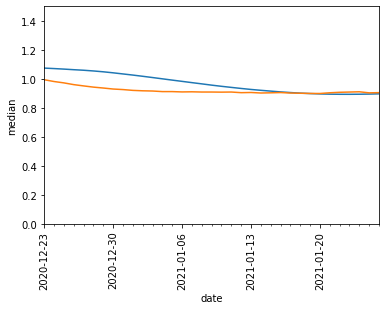

In [ ]:
ax = sb.lineplot(x="date", y="median", ci=None, data=df1_onestate)
ax = sb.lineplot(x="date", y="median", ci=None, data=df2_onestate)


ax.set_xlim(left=startdate_common, right=enddate_common)
ax.set_ylim(0,1.5)
ax.xaxis.set_major_locator(ticker.MultipleLocator(7))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(1))
ax.xaxis.set_tick_params(rotation=90)

The values as suggested by the datasets are close to each other. We can join them if we need to do any analysis across both 2020 and 2021. If we just want to analyse 2020, we can simply use the rt.live dataset.

In [ ]:
df2_state_codes_list = df2_selected.state_code.unique()

In [ ]:
start_date = datetime.datetime.strptime("2021-01-27", "%Y-%m-%d")
end_date = datetime.datetime.strptime("2021-03-07", "%Y-%m-%d") # data from Covid Tracking ends on 7th March
df_to_append = df1_selected[(df1_selected.state_code.isin(df2_state_codes_list)) &
             (df1_selected.date.between(start_date, end_date, True))]
df_to_append 

,state,state_code,date,median,mean,sd,upper_90,lower_90
35,Alabama,AL,2021-01-27,0.880010,0.866950,0.048617,0.920163,0.772946
36,Alabama,AL,2021-01-28,0.878196,0.863797,0.050735,0.918551,0.766691
37,Alabama,AL,2021-01-29,0.876700,0.861163,0.052733,0.917391,0.757704
38,Alabama,AL,2021-01-30,0.876531,0.859138,0.054443,0.916462,0.750258
39,Alabama,AL,2021-01-31,0.875652,0.857793,0.055729,0.915539,0.743725
...,...,...,...,...,...,...,...,...
5577,Wyoming,WY,2021-03-03,0.974120,0.975283,0.034918,1.034047,0.921124
5578,Wyoming,WY,2021-03-04,0.975647,0.977035,0.035027,1.036589,0.922523
5579,Wyoming,WY,2021-03-05,0.977437,0.978819,0.035184,1.038706,0.924391
5580,Wyoming,WY,2021-03-06,0.979101,0.980623,0.035397,1.040488,0.926647


In [ ]:
df_rt_full = pd.concat([df2_selected[["state", "state_code", "date", "median", "mean"]], 
                       df_to_append[["state", "state_code", "date", "median", "mean"]]])
df_rt_full

,state,state_code,date,median,mean
0,Maine,ME,2020-03-02,1.347229,1.353815
1,Maine,ME,2020-03-03,1.339570,1.347466
2,Maine,ME,2020-03-04,1.336660,1.343113
3,Maine,ME,2020-03-05,1.334258,1.338407
4,Maine,ME,2020-03-06,1.329534,1.330090
...,...,...,...,...,...
5577,Wyoming,WY,2021-03-03,0.974120,0.975283
5578,Wyoming,WY,2021-03-04,0.975647,0.977035
5579,Wyoming,WY,2021-03-05,0.977437,0.978819
5580,Wyoming,WY,2021-03-06,0.979101,0.980623


In [ ]:
print(min(df_rt_full["date"]))
print(max(df_rt_full["date"]))

2020-01-09 00:00:00
2021-03-07 00:00:00


In [ ]:
df_rt_full.to_csv("/content/drive/MyDrive/CZ1115introDSAI/Reproduction Rate/rt_full.csv", index=False)

## Let's analyse some critical events

https://www.ajmc.com/view/a-timeline-of-covid19-developments-in-2020

https://www.usatoday.com/storytelling/coronavirus-reopening-america-map/

https://en.wikipedia.org/wiki/U.S._state_and_local_government_responses_to_the_COVID-19_pandemic

https://www.cdc.gov/mmwr/volumes/69/wr/pdfs/mm6935a2-H.pdf

https://www.nbcnews.com/health/health-news/here-are-stay-home-orders-across-country-n1168736


In [ ]:
import pandas as pd
import numpy as np
import datetime 
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
import seaborn as sb

In [ ]:
!pip -q install us

     |████████████████████████████████| 133kB 20.7MB/s 


In [ ]:
import us # this is so that we can easily convert states and state codes

In [ ]:
df1_selected = pd.read_csv("/content/drive/MyDrive/CZ1115introDSAI/Reproduction Rate/rt_epiforecast_selected.csv",
                          parse_dates=["date"])
df1_selected.head()

,state,state_code,date,median,mean,sd,upper_90,lower_90
0,Alabama,AL,2020-12-23,0.930981,0.960596,0.101041,1.146368,0.850935
1,Alabama,AL,2020-12-24,0.932155,0.958066,0.093153,1.130443,0.852542
2,Alabama,AL,2020-12-25,0.932148,0.955463,0.086013,1.116509,0.856701
3,Alabama,AL,2020-12-26,0.932176,0.952809,0.079629,1.099856,0.860315
4,Alabama,AL,2020-12-27,0.931248,0.950129,0.073963,1.087212,0.861933


In [ ]:
df2_selected = pd.read_csv("/content/drive/MyDrive/CZ1115introDSAI/Reproduction Rate/rt_rtlive_selected.csv",
                           parse_dates=["date"])
df2_selected.head()

,state,state_code,date,median,mean,upper_80,lower_80
0,Maine,ME,2020-03-02,1.347229,1.353815,1.538081,1.135023
1,Maine,ME,2020-03-03,1.339570,1.347466,1.514020,1.127512
2,Maine,ME,2020-03-04,1.336660,1.343113,1.502090,1.130994
3,Maine,ME,2020-03-05,1.334258,1.338407,1.480786,1.129211
4,Maine,ME,2020-03-06,1.329534,1.330090,1.486668,1.152407


### See the overall trend in reproductive number, and stringency index for 2020

In [ ]:
df2_2020 = df2_selected[df2_selected.date < datetime.datetime.strptime("2021-01-01", "%Y-%m-%d")]

In [ ]:
us_stringency_df_2020 = pd.read_csv("/content/drive/MyDrive/CZ1115introDSAI/Reproduction Rate/StringencyIndex2020.csv", parse_dates=["date"])
us_stringency_df_2020.head()

,state,state_code,date,jurisdiction,stringencyindex,governmentresponseindex
0,NaN,NaN,2020-01-01,NAT_TOTAL,0.0,0.0
1,NaN,NaN,2020-01-02,NAT_TOTAL,0.0,0.0
2,NaN,NaN,2020-01-03,NAT_TOTAL,0.0,0.0
3,NaN,NaN,2020-01-04,NAT_TOTAL,0.0,0.0
4,NaN,NaN,2020-01-05,NAT_TOTAL,0.0,0.0


In [ ]:
national_stringency = us_stringency_df_2020[us_stringency_df_2020.jurisdiction == "NAT_TOTAL"]
national_stringency

,state,state_code,date,jurisdiction,stringencyindex,governmentresponseindex
0,NaN,NaN,2020-01-01,NAT_TOTAL,0.00,0.00
1,NaN,NaN,2020-01-02,NAT_TOTAL,0.00,0.00
2,NaN,NaN,2020-01-03,NAT_TOTAL,0.00,0.00
3,NaN,NaN,2020-01-04,NAT_TOTAL,0.00,0.00
4,NaN,NaN,2020-01-05,NAT_TOTAL,0.00,0.00
...,...,...,...,...,...,...
361,NaN,NaN,2020-12-27,NAT_TOTAL,71.76,68.44
362,NaN,NaN,2020-12-28,NAT_TOTAL,71.76,68.44
363,NaN,NaN,2020-12-29,NAT_TOTAL,71.76,68.44
364,NaN,NaN,2020-12-30,NAT_TOTAL,71.76,68.44


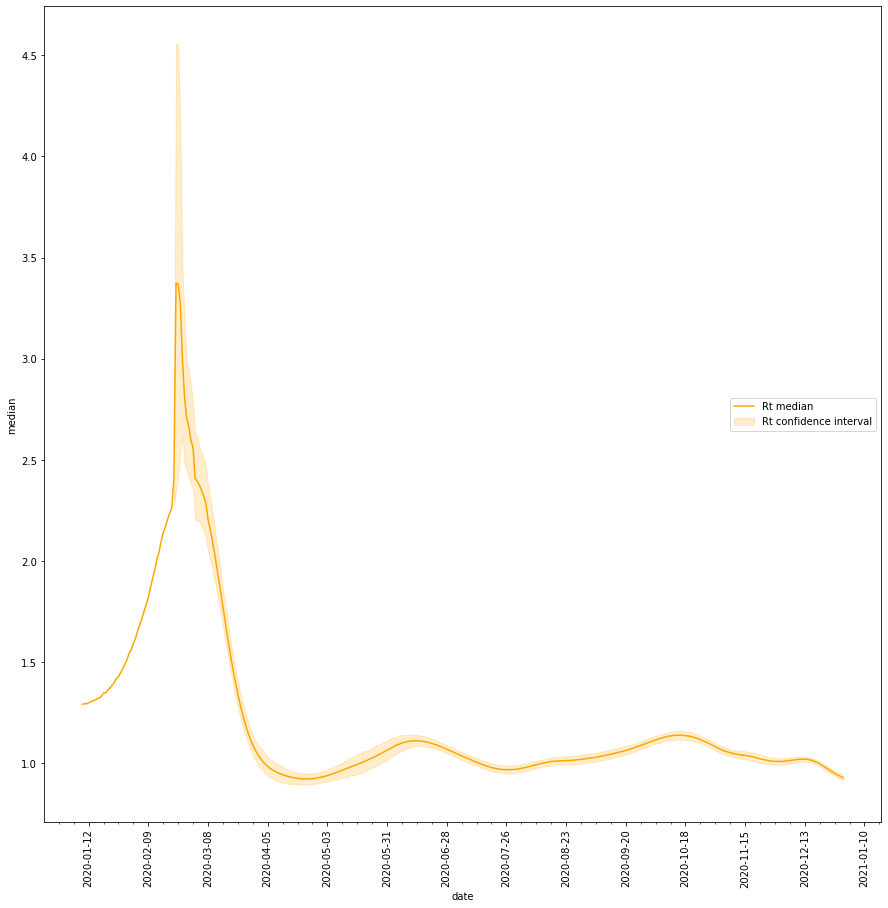

In [ ]:
f = plt.figure(figsize=(15,15))
# ax = sb.lineplot(x="date", y="stringencyindex", ci=95, 
#                  data=national_stringency, color="teal")
# ax.legend(["Stringency Index"], loc='upper right')
# ax2 = ax.twinx()
ax2 = sb.lineplot(x="date", y="median", ci=95, 
                 data=df2_2020, color="orange")
ax2.legend(["Rt median", "Rt confidence interval"], loc='center right')
ax2.xaxis.set_major_locator(ticker.MultipleLocator(28))
ax2.xaxis.set_minor_locator(ticker.MultipleLocator(7))
ax2.xaxis.set_tick_params(rotation=90)

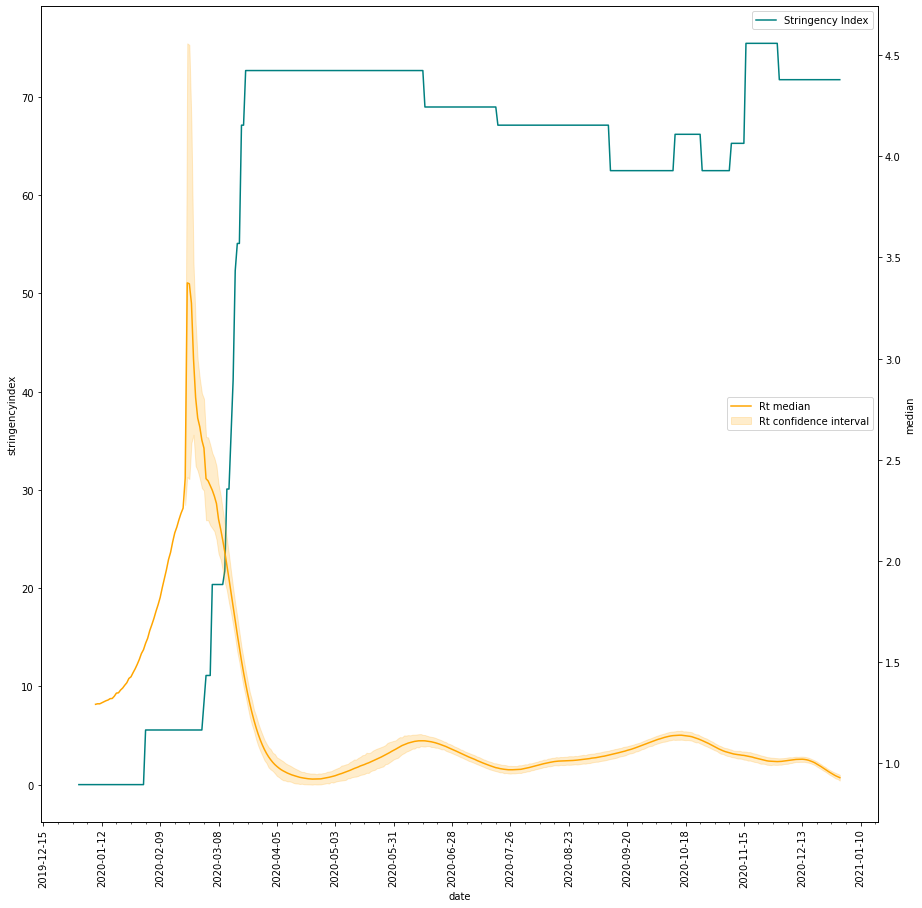

In [ ]:
f = plt.figure(figsize=(15,15))
ax = sb.lineplot(x="date", y="stringencyindex", ci=95, 
                 data=national_stringency, color="teal")
ax.legend(["Stringency Index"], loc='upper right')
ax2 = ax.twinx()
ax2 = sb.lineplot(x="date", y="median", ci=95, 
                 data=df2_2020, color="orange")
ax2.legend(["Rt median", "Rt confidence interval"], loc='center right')
ax.xaxis.set_major_locator(ticker.MultipleLocator(28))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(7))
ax.xaxis.set_tick_params(rotation=90)

There was a huge peak in the overall number of cases around Mid-Feb, followed by a dip from march to end April, then another peak in May, then dip in July, and peak again Mid-October. The light blue "area" represents the confidence interval. Rt seems to have a negative correlation with the stringency index.

### Global Air Travel is Restricted starting from 2 Feb 2020

In [ ]:
df2_GAT = df2_selected[df2_selected.date < datetime.datetime.strptime("2020-02-15", "%Y-%m-%d")]

In [ ]:
df2_GAT.state.unique()

array(['Washington'], dtype=object)

We only have data on Washington

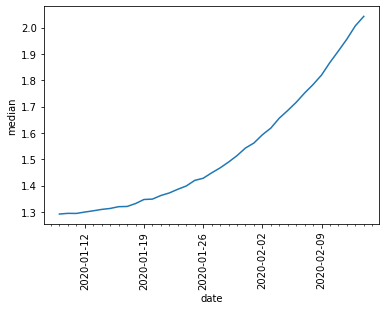

In [ ]:
ax = sb.lineplot(x="date", y="median", ci=95, 
                 data=df2_GAT)
ax.xaxis.set_major_locator(ticker.MultipleLocator(7))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(1))
ax.xaxis.set_tick_params(rotation=90)

**For this particular period of time, there is only data on one state (Washington). The number of cases is increasing rapidly. We cannot really conclude the effect of the Air Travel Restriction**

### March 19 — California Issues Statewide Stay-at-Home Order

In [ ]:
df2_CA = df2_selected[df2_selected.state=="California"]
df2_CA

,state,state_code,date,median,mean,upper_80,lower_80
16100,California,CA,2020-02-25,2.562254,2.573919,2.901932,2.276048
16101,California,CA,2020-02-26,2.559225,2.564611,2.826910,2.234875
16102,California,CA,2020-02-27,2.558339,2.558753,2.831498,2.264724
16103,California,CA,2020-02-28,2.543084,2.552855,2.794201,2.268561
16104,California,CA,2020-02-29,2.537658,2.543754,2.772596,2.269760
...,...,...,...,...,...,...,...
16432,California,CA,2021-01-22,0.806837,0.809786,0.961593,0.656575
16433,California,CA,2021-01-23,0.802264,0.809541,0.938985,0.636817
16434,California,CA,2021-01-24,0.802056,0.810809,0.962833,0.652475
16435,California,CA,2021-01-25,0.802516,0.809322,0.948306,0.631362


In [ ]:
df2_CA_SHO = df2_CA[(df2_CA.date < datetime.datetime.strptime("2020-04-30", "%Y-%m-%d")) &
                      (df2_CA.date > datetime.datetime.strptime("2020-03-01", "%Y-%m-%d"))]

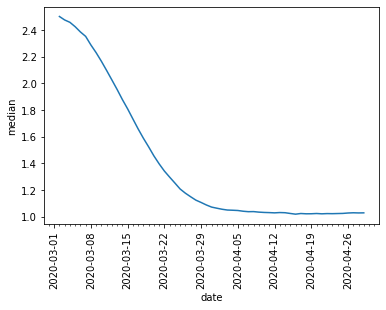

In [ ]:
ax = sb.lineplot(x="date", y="median", ci=95, 
                 data=df2_CA_SHO)
ax.xaxis.set_major_locator(ticker.MultipleLocator(7))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(1))
ax.xaxis.set_tick_params(rotation=90)

Even though the lockdown measures helped, the effective reproduction rate remained higher than 1. We shall do analysis on all states.

### Visualize the data from March to May for states with a lockdown order vs those without

In [ ]:
df_info_SHO = pd.read_csv("/content/drive/MyDrive/CZ1115introDSAI/Reproduction Rate/StayHomeOrder.csv")
df_info_SHO

,state/territory,state_code,state_of_emergency_declared,stay_at_home_ordered,face_coverings_required_in_public,gatherings_banned,out-of-state_travel_restrictions,closures_schools,closures_daycares,closures_bars_&_sit-down_restaurants,closures_non-essential_retail
0,Alabama,AL,March 13,April 4,Yes,10 or more,No,Yes (remainder of term),Yes,Yes,Yes
1,Alaska,AK,March 11,March 28,No,10 or more,Mandatory quarantine,Yes (remainder of term),Yes,Yes,Yes
2,American Samoa,AS,January 29,No,No,10 or more,Travel suspended,Yes (remainder of term),Yes,No,No
3,Arizona,AZ,March 11,March 31,No,50 or more,Limited quarantine,Yes (remainder of term),Yes,Yes,Yes
4,Arkansas,AR,March 11,No,Yes,10 or more,No,Yes (remainder of term),Yes,Yes,Regional
5,California,CA,March 4,March 19,Yes,All,No,Yes (remainder of term),Yes,Yes,Yes
6,Colorado,CO,March 10,March 26,Yes,10 or more,No,Yes (remainder of term),Restricted,Yes,Yes
7,Connecticut,CT,March 10,March 23,Yes,All,Recommended quarantine,Yes (remainder of term),Yes,Yes,Yes
8,Delaware,DE,March 12,March 24,Yes,All,Mandatory quarantine,Yes (remainder of term),Yes,Yes,Yes
9,District of Columbia,DC,March 11,March 30,Yes,10 or more,No,Yes (remainder of term),Yes,Yes,Yes


Wyoming has "regional" stay home order. Let's see how the Rt changes.

In [ ]:
df2_WY = df2_selected[df2_selected.state_code=="WY"]

In [ ]:
df2_WY_SHO = df2_WY[(df2_WY.date < datetime.datetime.strptime("2020-04-30", "%Y-%m-%d")) &
                      (df2_WY.date > datetime.datetime.strptime("2020-03-01", "%Y-%m-%d"))]

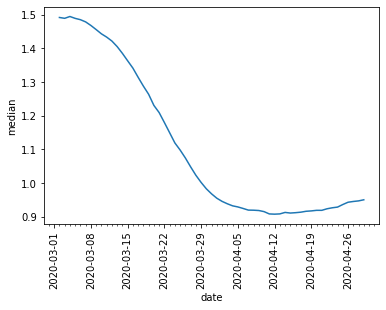

In [ ]:
ax = sb.lineplot(x="date", y="median", ci=95, 
                 data=df2_WY_SHO)
ax.xaxis.set_major_locator(ticker.MultipleLocator(7))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(1))
ax.xaxis.set_tick_params(rotation=90)

**We shall exclude those states with only regional stay home order, since they are ambiguous, and also those with (advisory) or (partial advisory)**

In [ ]:
df_info_SHO.stay_at_home_ordered.unique()

array(['April 4', 'March 28', 'No', 'March 31', 'March 19', 'March 26',
       'March 23', 'March 24', 'March 30', 'April 3', 'March 25',
       'March 21', 'March 26 (advisory)', 'April 2',
       'March 24 (advisory)', 'March 27', 'April 6', 'April 1',
       'March 22', 'April 2 (partial advisory)', 'March 15', 'April 7',
       'Regional', 'March 25 (declared unconstitutional on May 13)'],
      dtype=object)

In [ ]:
# choose the states that have no stay at home ordered
df_info_SHO[df_info_SHO.stay_at_home_ordered == "No"]

,state/territory,state_code,state_of_emergency_declared,stay_at_home_ordered,face_coverings_required_in_public,gatherings_banned,out-of-state_travel_restrictions,closures_schools,closures_daycares,closures_bars_&_sit-down_restaurants,closures_non-essential_retail
2,American Samoa,AS,January 29,No,No,10 or more,Travel suspended,Yes (remainder of term),Yes,No,No
4,Arkansas,AR,March 11,No,Yes,10 or more,No,Yes (remainder of term),Yes,Yes,Regional
12,Guam,GU,March 14,No,No,All,No,Yes (remainder of term),Yes,Yes,Yes
17,Iowa,IA,March 9,No,No,10 or more,No,Yes (remainder of term),Yes,Yes,Yes
29,Nebraska,NE,March 13,No,No,10 or more,Limited quarantine,Yes (remainder of term),Restricted,Restricted,No
36,North Dakota,ND,March 13,No,No,50 or more,Mandatory quarantine,Yes (remainder of term),Yes,Yes,Yes
37,Northern Mariana Islands,MP,January 29,No,No,10 or more,No,Yes (remainder of term),Yes,No,No


In [ ]:
without_SHO = df_info_SHO[df_info_SHO.stay_at_home_ordered == "No"].state_code
print(without_SHO)

2     AS
4     AR
12    GU
17    IA
29    NE
36    ND
37    MP
Name: state_code, dtype: object


In [ ]:
ambiguous_SHO = df_info_SHO[(df_info_SHO.stay_at_home_ordered == "Regional") | 
                            (df_info_SHO.stay_at_home_ordered.apply(lambda x: "advisory" in x))].state_code
print(ambiguous_SHO)

19    KY
23    MA
39    OK
45    SD
48    UT
55    WY
Name: state_code, dtype: object


In [ ]:
df2_states_without_SHO = df2_selected[df2_selected.state_code.isin(without_SHO)]
df2_states_with_SHO = df2_selected[(~df2_selected.state_code.isin(without_SHO)) &
                                   (~df2_selected.state_code.isin(ambiguous_SHO))]

In [ ]:
# only choose the period between March and May
df2_states_without_SHO = df2_states_without_SHO[(df2_states_without_SHO.date < datetime.datetime.strptime("2020-06-01", "%Y-%m-%d")) &
                                                (df2_states_without_SHO.date >= datetime.datetime.strptime("2020-03-01", "%Y-%m-%d"))]
df2_states_with_SHO = df2_states_with_SHO[(df2_states_with_SHO.date < datetime.datetime.strptime("2020-06-01", "%Y-%m-%d")) &
                                                (df2_states_with_SHO.date >= datetime.datetime.strptime("2020-03-01", "%Y-%m-%d"))]

In [ ]:
print(len(df2_states_without_SHO.state.unique()))
print(len(df2_states_with_SHO.state.unique()))

4
41


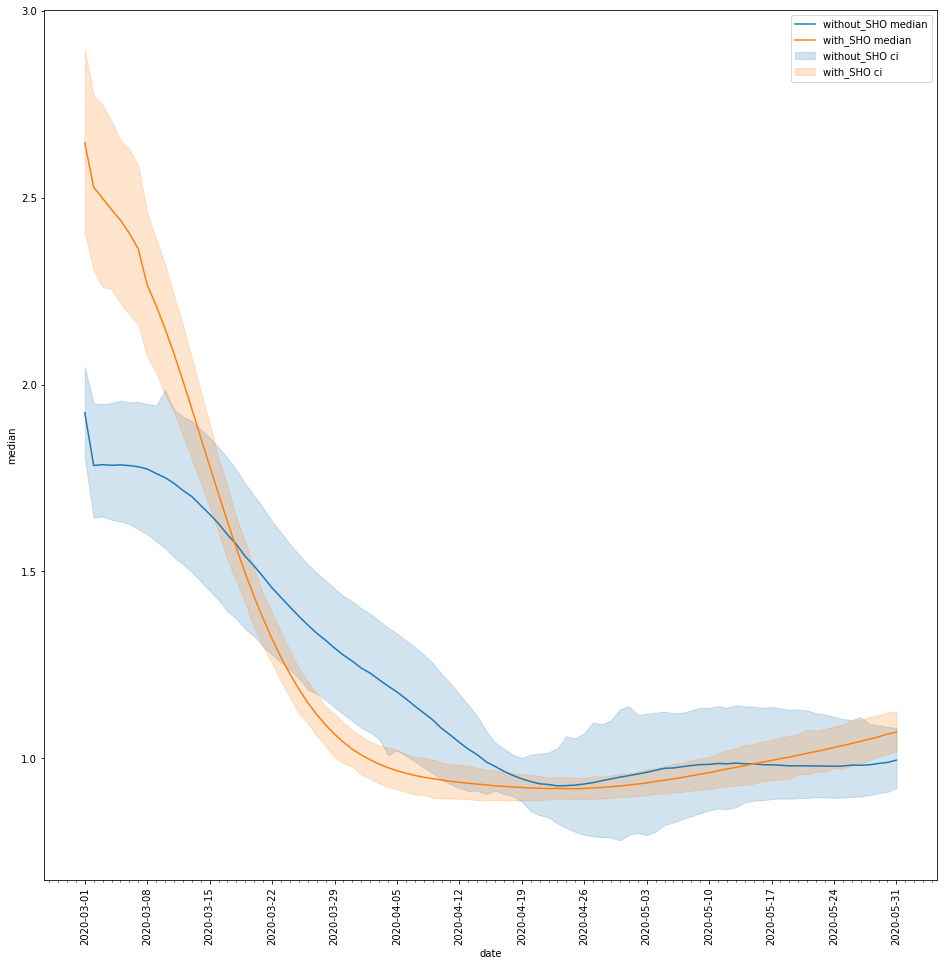

In [ ]:
f = plt.figure(figsize=(16, 16))
ax = sb.lineplot(x="date", y="median", ci=95, 
                 data=df2_states_without_SHO)

ax = sb.lineplot(x="date", y="median", ci=95, 
                 data=df2_states_with_SHO)

ax.legend(["without_SHO median", "with_SHO median", "without_SHO ci", "with_SHO ci"])

ax.xaxis.set_major_locator(ticker.MultipleLocator(7))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(1))
ax.xaxis.set_tick_params(rotation=90)

### Quantify the effect of lockdown on Rt

In [ ]:
df2_states_without_SHO.state_code.unique()

array(['IA', 'AR', 'ND', 'NE'], dtype=object)

In [ ]:
ambiguous_SHO

19    KY
23    MA
39    OK
45    SD
48    UT
55    WY
Name: state_code, dtype: object

In [ ]:
with_SHO = df2_states_with_SHO.state_code.unique()
with_SHO

array(['ME', 'NH', 'VT', 'RI', 'CT', 'NY', 'NJ', 'PA', 'DE', 'MD', 'VA',
       'DC', 'NC', 'SC', 'GA', 'FL', 'WV', 'OH', 'IN', 'MI', 'AL', 'TN',
       'IL', 'WI', 'MN', 'MS', 'MO', 'LA', 'KS', 'TX', 'NM', 'CO', 'MT',
       'ID', 'AZ', 'WA', 'OR', 'NV', 'CA', 'AK', 'HI'], dtype=object)

We shall calculate the following: 

For states **with** SHO: **(Average Rt for 14 days before SHO - Average Rt for 14 days after SHO)** 

For states **without** SHO: use March 23nd as the date for calculation (it has a high slope as seen from the graph above).


In [ ]:
df_info_SHO.stay_at_home_ordered.unique()

array(['April 4', 'March 28', 'No', 'March 31', 'March 19', 'March 26',
       'March 23', 'March 24', 'March 30', 'April 3', 'March 25',
       'March 21', 'March 26 (advisory)', 'April 2',
       'March 24 (advisory)', 'March 27', 'April 6', 'April 1',
       'March 22', 'April 2 (partial advisory)', 'March 15', 'April 7',
       'Regional', 'March 25 (declared unconstitutional on May 13)'],
      dtype=object)

In [ ]:
# some string processing to get the date of the lockdown
dateinfo = 'March 25 (declared unconstitutional on May 13)'
datetime.datetime.strptime(dateinfo.split("(")[0].strip(), "%B %d").replace(year=2020).date()

datetime.date(2020, 3, 25)

In [ ]:
# how to check days after and days before
num_days = 14
datetime.datetime.strptime(dateinfo.split("(")[0].strip(), "%B %d").replace(year=2020).date() + datetime.timedelta(days=num_days)

datetime.date(2020, 4, 8)

In [ ]:
num_days = 14
change_rt_dict = {"state_code": [], "before_average_rt": [], "after_average_rt": [], "is_sho": [], "pivot_date":[]}

for sho_state_code in df2_states_with_SHO.state_code.unique():
  change_rt_dict["state_code"].append(sho_state_code)
  change_rt_dict["is_sho"].append(True)

  state_df = df2_selected[df2_selected.state_code == sho_state_code] 

  dateinfo = df_info_SHO[df_info_SHO.state_code == sho_state_code].stay_at_home_ordered
  lockdown_date = datetime.datetime.strptime(dateinfo.iloc[0].split("(")[0].strip(), "%B %d").replace(year=2020)
  change_rt_dict["pivot_date"].append(lockdown_date)
  before_date = lockdown_date - datetime.timedelta(days=num_days)
  after_date = lockdown_date + datetime.timedelta(days=num_days)
  
  before_average_rt = sum(state_df[state_df.date.between(before_date, lockdown_date)]["median"])/num_days
  after_average_rt = sum(state_df[state_df.date.between(lockdown_date, after_date)]["median"])/num_days
  
  change_rt_dict["before_average_rt"].append(before_average_rt)
  change_rt_dict["after_average_rt"].append(after_average_rt)

for sho_state_code in df2_states_without_SHO.state_code.unique():
  change_rt_dict["state_code"].append(sho_state_code)
  change_rt_dict["is_sho"].append(False)

  state_df = df2_selected[df2_selected.state_code == sho_state_code] 

  dateinfo = "March 23"
  lockdown_date = datetime.datetime.strptime(dateinfo.split("(")[0].strip(), "%B %d").replace(year=2020)
  change_rt_dict["pivot_date"].append(lockdown_date)
  before_date = lockdown_date - datetime.timedelta(days=num_days)
  after_date = lockdown_date + datetime.timedelta(days=num_days)
  
  before_average_rt = sum(state_df[state_df.date.between(before_date, lockdown_date)]["median"])/num_days
  after_average_rt = sum(state_df[state_df.date.between(lockdown_date, after_date)]["median"])/num_days
  
  change_rt_dict["before_average_rt"].append(before_average_rt)
  change_rt_dict["after_average_rt"].append(after_average_rt)

change_rt_df = pd.DataFrame.from_dict(change_rt_dict)
change_rt_df

,state_code,before_average_rt,after_average_rt,is_sho,pivot_date
0,ME,1.114233,1.088335,True,2020-04-02
1,NH,1.508650,1.182939,True,2020-03-27
2,VT,1.233825,0.768657,True,2020-03-25
3,RI,1.958110,1.229469,True,2020-03-28
4,CT,2.395018,1.361295,True,2020-03-23
5,NY,2.303707,0.922996,True,2020-03-22
6,NJ,2.752863,1.221766,True,2020-03-21
7,PA,1.395415,0.943386,True,2020-04-01
8,DE,1.906529,1.406254,True,2020-03-24
9,MD,1.664612,1.061968,True,2020-03-30


In [ ]:
change_rt_df["change_average_rt"] = change_rt_df["before_average_rt"] - change_rt_df["after_average_rt"]
change_rt_df

,state_code,before_average_rt,after_average_rt,is_sho,pivot_date,change_average_rt
0,ME,1.114233,1.088335,True,2020-04-02,0.025899
1,NH,1.508650,1.182939,True,2020-03-27,0.325711
2,VT,1.233825,0.768657,True,2020-03-25,0.465169
3,RI,1.958110,1.229469,True,2020-03-28,0.728642
4,CT,2.395018,1.361295,True,2020-03-23,1.033724
5,NY,2.303707,0.922996,True,2020-03-22,1.380710
6,NJ,2.752863,1.221766,True,2020-03-21,1.531097
7,PA,1.395415,0.943386,True,2020-04-01,0.452029
8,DE,1.906529,1.406254,True,2020-03-24,0.500275
9,MD,1.664612,1.061968,True,2020-03-30,0.602644


In [ ]:
# The average change in Rt for SHO and for the "control" group
change_with_SHO = (change_rt_df[change_rt_df.is_sho]["change_average_rt"]).mean()
change_without_SHO = (change_rt_df[~change_rt_df.is_sho]["change_average_rt"]).mean()
print("Change in Rt with SHO", change_with_SHO)
print("Change in Rt without SHO", change_without_SHO)

Change in Rt with SHO 0.49096087636816077
Change in Rt without SHO 0.3541621556054807


**Some states have very late lockdown date!!!** For example, Missouri (MO) lockdown date is on April 6. Let's try to visualize the Rt in Missouri during this period. 

In [ ]:
df2_MO = df2_selected[df2_selected.state_code=="MO"]

In [ ]:
df2_MO_SHO = df2_WY[(df2_WY.date < datetime.datetime.strptime("2020-04-30", "%Y-%m-%d")) &
                      (df2_WY.date > datetime.datetime.strptime("2020-03-01", "%Y-%m-%d"))]

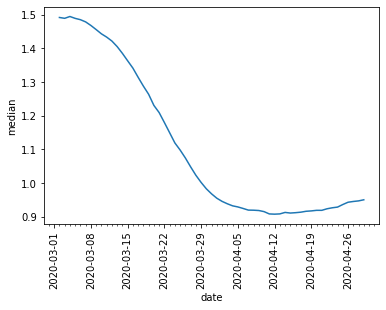

In [ ]:
ax = sb.lineplot(x="date", y="median", ci=95, 
                 data=df2_MO_SHO)
ax.xaxis.set_major_locator(ticker.MultipleLocator(7))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(1))
ax.xaxis.set_tick_params(rotation=90)

It seems that the period from early March to early April is a period with a huge decrease in Rt even though there is no lockdown. Therefore, to really get the effect of lockdown, we need to separate the two periods. One from 10th March to 31st March and another from 1st April onwards. In the code below, we will just calculate the average for states that have lockdown between 10th March and 31st March vs states without any SHO at all.

In [ ]:
# The average change in Rt for SHO (before April) and for the "control" group
start_date = datetime.datetime.strptime("2020-03-10", "%Y-%m-%d")
end_date = datetime.datetime.strptime("2020-03-31", "%Y-%m-%d")

change_with_SHO = (change_rt_df[change_rt_df.is_sho & 
                                change_rt_df.pivot_date.between(start_date, end_date)]
                                ["change_average_rt"]).mean()
change_without_SHO = (change_rt_df[~change_rt_df.is_sho]["change_average_rt"]).mean()
print("Change in Rt with SHO", change_with_SHO)
print("Change in Rt without SHO", change_without_SHO) #due to other factors

Change in Rt with SHO 0.5820637959380386
Change in Rt without SHO 0.3541621556054807


In [ ]:
print("Effect of SHO:", change_with_SHO - change_without_SHO)

Effect of SHO: 0.2279016403325579


## Now we will analyse the states

**Summary**

For every 2 states, calculate:
  + their correlation in terms of cases (done in another notebook)
  + their correlation in terms of Rt
  + their average difference in stringency
  + whether they are neighbors or not (done in another notebook)

Link the correlation to their difference in stringency
and whether they are neighbors


**Get the data for Rt**

In [ ]:
df_rt_full = pd.read_csv("/content/drive/MyDrive/CZ1115introDSAI/Reproduction Rate/rt_full.csv",
                         parse_dates=["date"])

In [ ]:
startdate = datetime.datetime.strptime("2020-01-09", "%Y-%m-%d")
enddate = datetime.datetime.strptime("2021-03-07", "%Y-%m-%d")
inrange_df_rt_selected = df_rt_full[df_rt_full.date.between(startdate, enddate, inclusive=True)]
inrange_df_rt_selected

,state,state_code,date,median,mean
0,Maine,ME,2020-03-02,1.347229,1.353815
1,Maine,ME,2020-03-03,1.339570,1.347466
2,Maine,ME,2020-03-04,1.336660,1.343113
3,Maine,ME,2020-03-05,1.334258,1.338407
4,Maine,ME,2020-03-06,1.329534,1.330090
...,...,...,...,...,...
19131,Wyoming,WY,2021-03-03,0.974120,0.975283
19132,Wyoming,WY,2021-03-04,0.975647,0.977035
19133,Wyoming,WY,2021-03-05,0.977437,0.978819
19134,Wyoming,WY,2021-03-06,0.979101,0.980623


In [ ]:
state_code_all = df_rt_full.state_code.unique()
state_code_all

array(['ME', 'NH', 'VT', 'MA', 'RI', 'CT', 'NY', 'NJ', 'PA', 'DE', 'MD',
       'VA', 'DC', 'NC', 'SC', 'GA', 'FL', 'KY', 'WV', 'OH', 'IN', 'MI',
       'AL', 'TN', 'IL', 'WI', 'MN', 'MS', 'IA', 'MO', 'AR', 'LA', 'ND',
       'SD', 'NE', 'KS', 'OK', 'TX', 'NM', 'CO', 'WY', 'MT', 'ID', 'UT',
       'AZ', 'WA', 'OR', 'NV', 'CA', 'AK', 'HI'], dtype=object)

**Get the data for stringency index**

In [ ]:
us_stringency_df = pd.read_csv("/content/drive/MyDrive/CZ1115introDSAI/Reproduction Rate/StringencyIndex.csv", 
                               parse_dates = ["date"])
us_stringency_df 

,state,state_code,date,jurisdiction,stringencyindex,governmentresponseindex
0,NaN,NaN,2020-01-01,NAT_TOTAL,0.00,0.00
1,NaN,NaN,2020-01-02,NAT_TOTAL,0.00,0.00
2,NaN,NaN,2020-01-03,NAT_TOTAL,0.00,0.00
3,NaN,NaN,2020-01-04,NAT_TOTAL,0.00,0.00
4,NaN,NaN,2020-01-05,NAT_TOTAL,0.00,0.00
...,...,...,...,...,...,...
24747,Wyoming,WY,2021-04-16,STATE_TOTAL,51.85,52.66
24748,Wyoming,WY,2021-04-17,STATE_TOTAL,51.85,52.66
24749,Wyoming,WY,2021-04-18,STATE_TOTAL,51.85,52.66
24750,Wyoming,WY,2021-04-19,STATE_TOTAL,51.85,53.91


In [ ]:
startdate = datetime.datetime.strptime("2020-01-09", "%Y-%m-%d")
enddate = datetime.datetime.strptime("2021-03-07", "%Y-%m-%d")
inrange_us_stringency_df = pd.DataFrame(us_stringency_df[us_stringency_df.date.between(startdate, enddate, 
                                                        inclusive=True)])
inrange_us_stringency_df                                

,state,state_code,date,jurisdiction,stringencyindex,governmentresponseindex
8,NaN,NaN,2020-01-09,NAT_TOTAL,0.00,0.00
9,NaN,NaN,2020-01-10,NAT_TOTAL,0.00,0.00
10,NaN,NaN,2020-01-11,NAT_TOTAL,0.00,0.00
11,NaN,NaN,2020-01-12,NAT_TOTAL,0.00,0.00
12,NaN,NaN,2020-01-13,NAT_TOTAL,0.00,0.00
...,...,...,...,...,...,...
24703,Wyoming,WY,2021-03-03,STATE_TOTAL,61.11,58.96
24704,Wyoming,WY,2021-03-04,STATE_TOTAL,61.11,58.96
24705,Wyoming,WY,2021-03-05,STATE_TOTAL,61.11,58.96
24706,Wyoming,WY,2021-03-06,STATE_TOTAL,61.11,58.96


### Visualise Rt & stringency index for some neighboring states

Rt

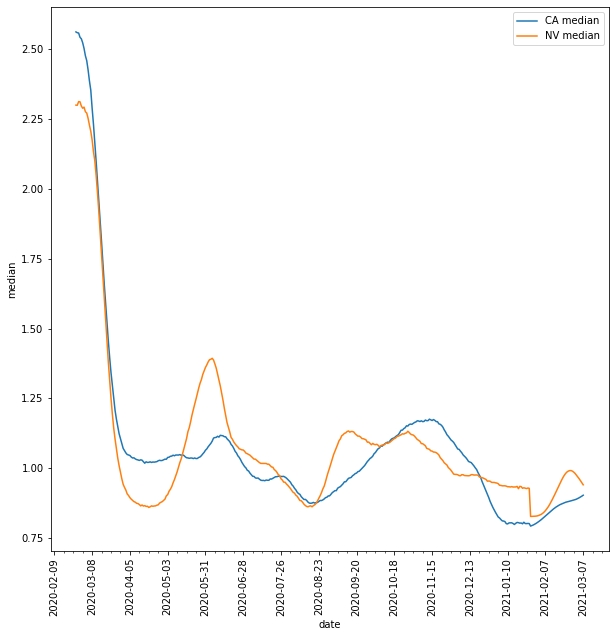

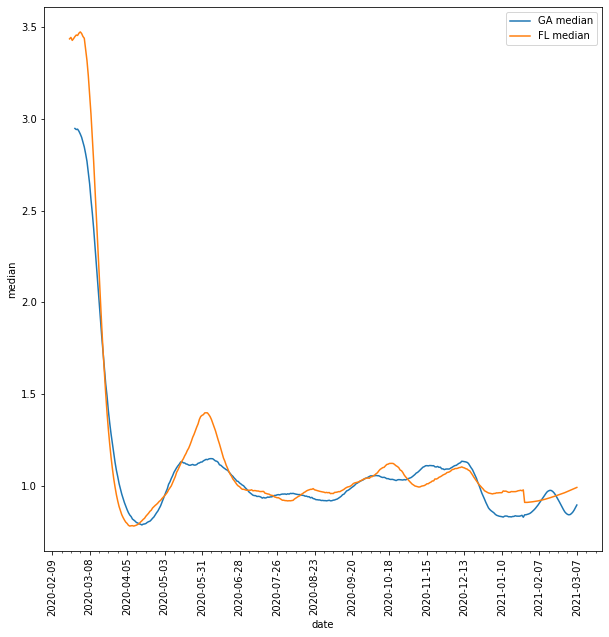

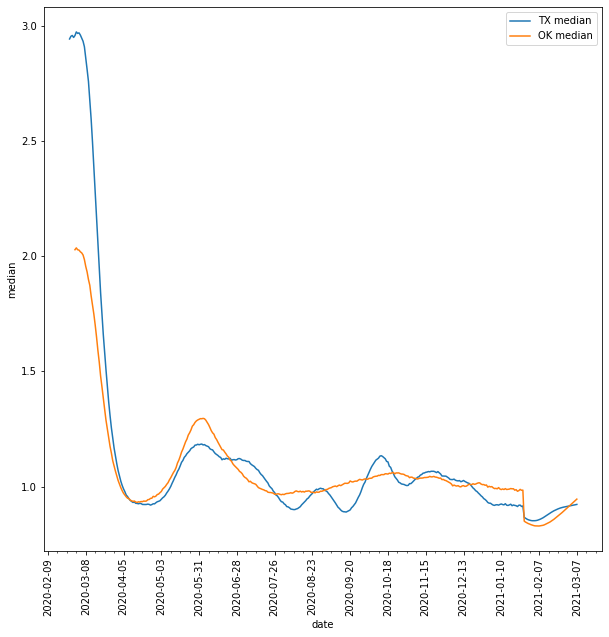

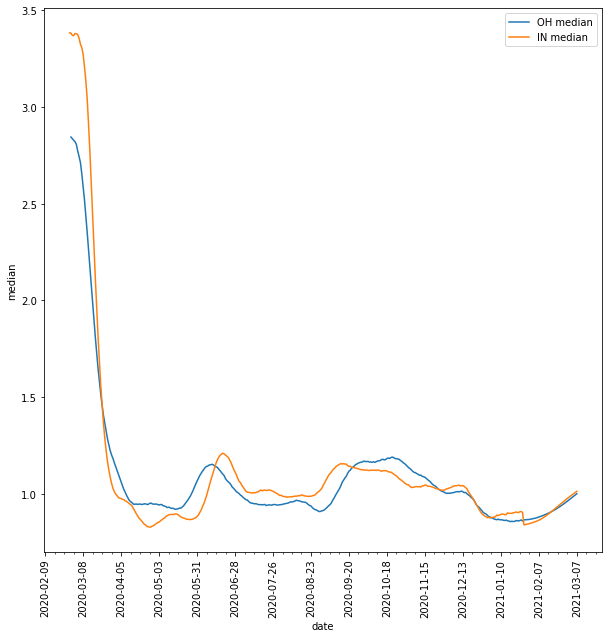

In [ ]:
t=0

neighbors = [('CA','NV'),('GA','FL'),('TX','OK'),('OH','IN')]

for s1,s2 in neighbors:
  df_s1 = inrange_df_rt_selected[inrange_df_rt_selected.state_code==s1]
  df_s2 = inrange_df_rt_selected[inrange_df_rt_selected.state_code==s2]
  
  f = plt.figure(t, figsize=(10, 10))
  
  ax = sb.lineplot(x="date", y="median", 
                  data=df_s1, legend="full")

  ax = sb.lineplot(x="date", y="median", 
                  data=df_s2, legend="full")

  ax.legend([s1 + " median", s2 + " median"])

  ax.xaxis.set_major_locator(ticker.MultipleLocator(28))
  ax.xaxis.set_minor_locator(ticker.MultipleLocator(7))
  ax.xaxis.set_tick_params(rotation=90)
  
  t+=1

Stringency index

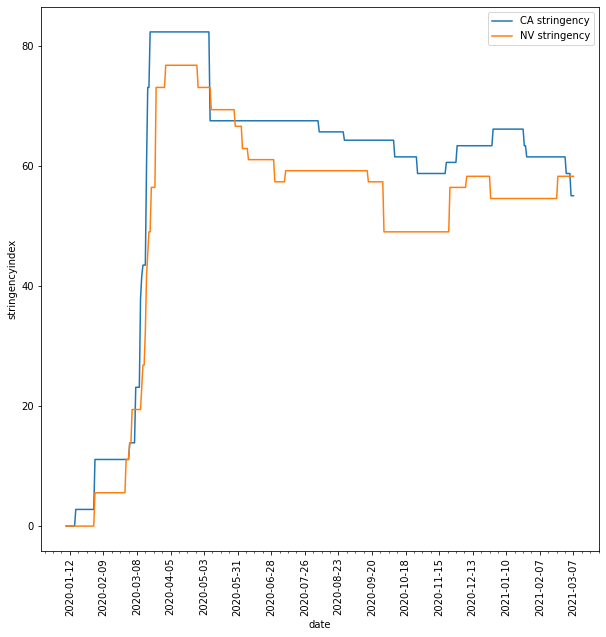

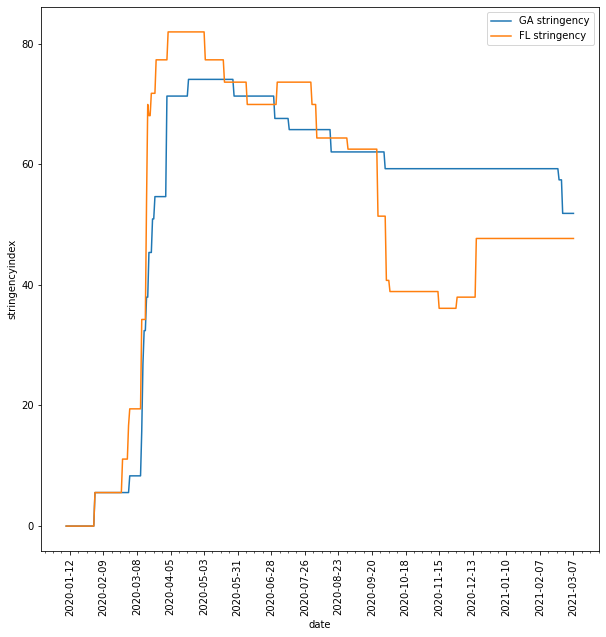

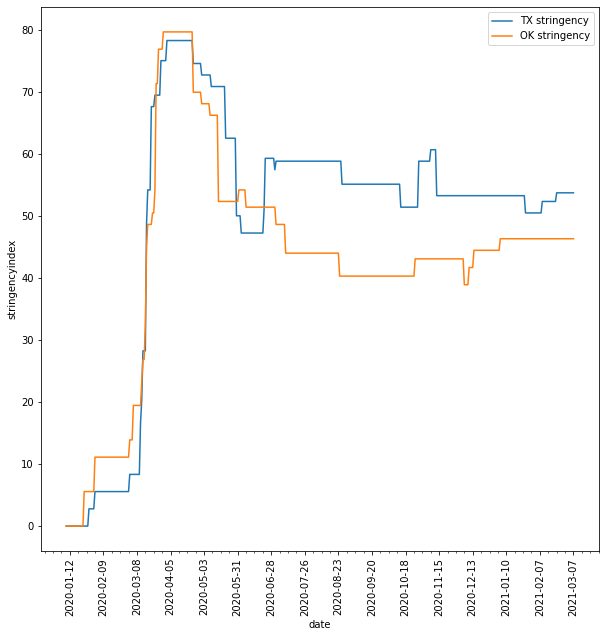

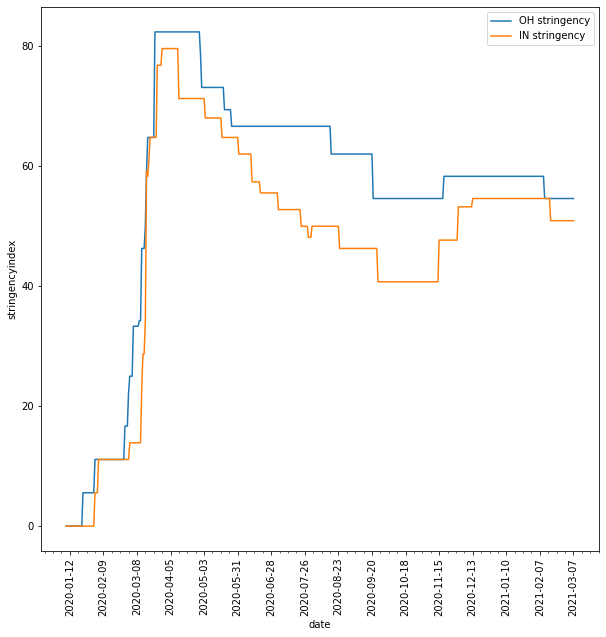

In [ ]:
t=0

neighbors = [('CA','NV'),('GA','FL'),('TX','OK'),('OH','IN')]

for s1,s2 in neighbors:
  df_s1 = inrange_us_stringency_df[inrange_us_stringency_df.state_code==s1]
  df_s2 = inrange_us_stringency_df[inrange_us_stringency_df.state_code==s2]
  
  f = plt.figure(t, figsize=(10, 10))
  
  ax = sb.lineplot(x="date", y="stringencyindex", 
                  data=df_s1, legend="full")

  ax = sb.lineplot(x="date", y="stringencyindex", 
                  data=df_s2, legend="full")

  ax.legend([s1 + " stringency", s2 + " stringency"])

  ax.xaxis.set_major_locator(ticker.MultipleLocator(28))
  ax.xaxis.set_minor_locator(ticker.MultipleLocator(7))
  ax.xaxis.set_tick_params(rotation=90)
  
  t+=1

### Visualise Rt & stringency index for some non-neighboring states

Rt

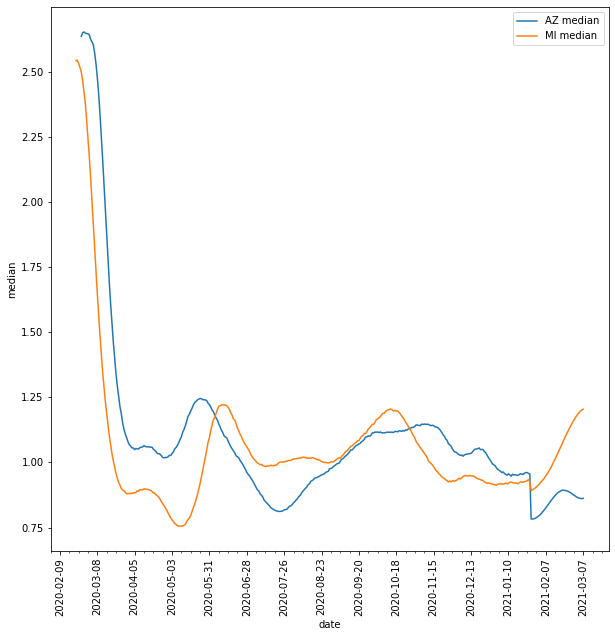

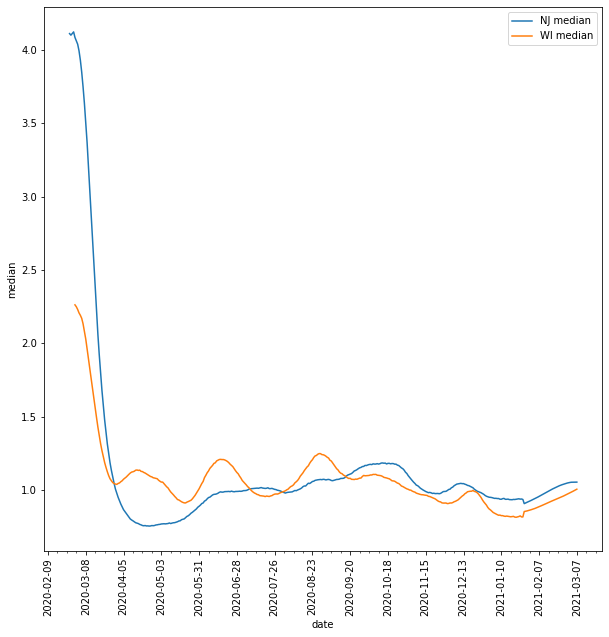

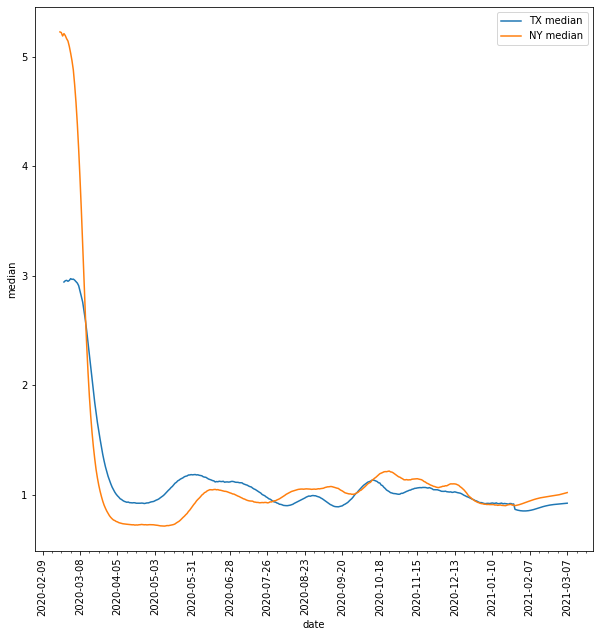

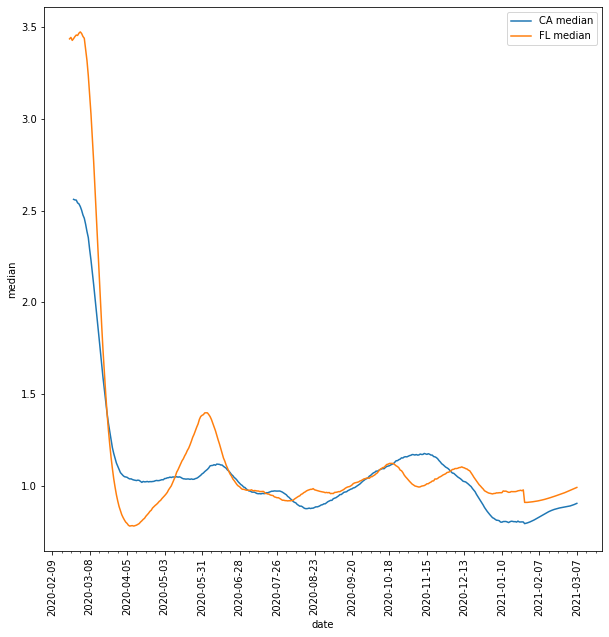

In [ ]:
non_neighbors = [('AZ','MI'),('NJ','WI'),('TX','NY'),('CA','FL')]
for s1,s2 in non_neighbors:
  df_s1 = inrange_df2_selected[inrange_df2_selected.state_code==s1]
  df_s2 = inrange_df2_selected[inrange_df2_selected.state_code==s2]
  
  f = plt.figure(t, figsize=(10, 10))
  
  ax = sb.lineplot(x="date", y="median", 
                  data=df_s1, legend="full")

  ax = sb.lineplot(x="date", y="median", 
                  data=df_s2, legend="full")

  ax.legend([s1 + " median", s2 + " median"])

  ax.xaxis.set_major_locator(ticker.MultipleLocator(28))
  ax.xaxis.set_minor_locator(ticker.MultipleLocator(7))
  ax.xaxis.set_tick_params(rotation=90)
  
  t+=1

Stringency Index

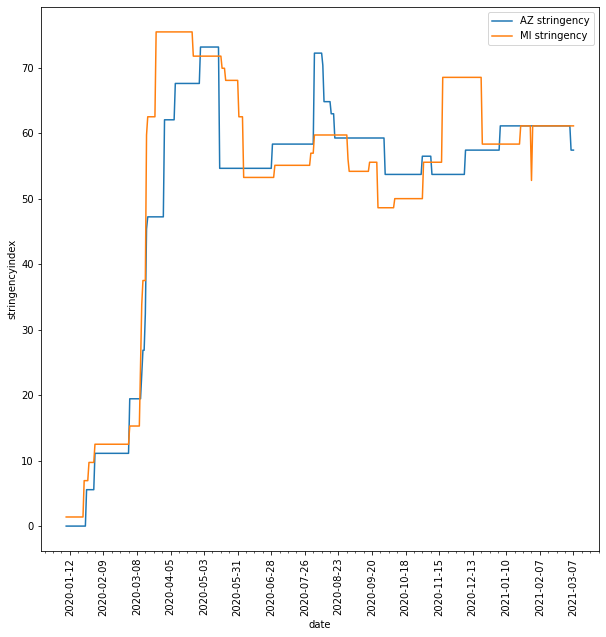

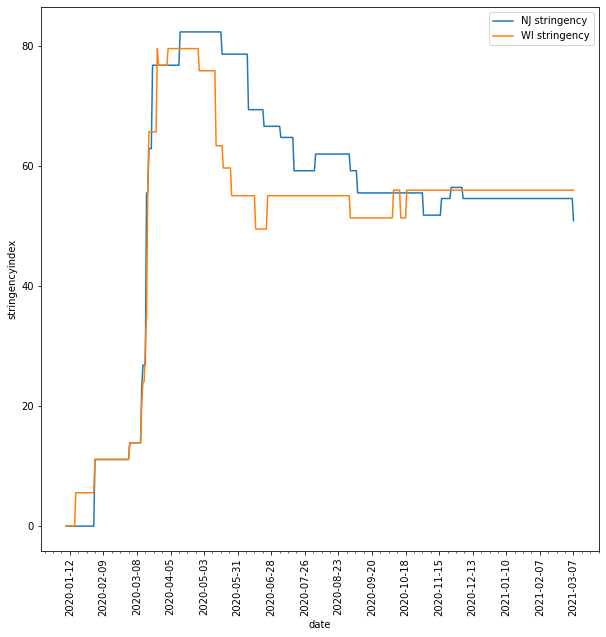

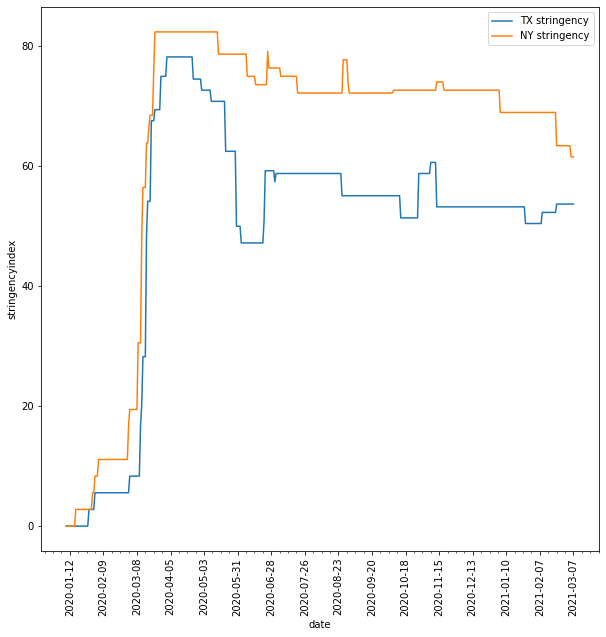

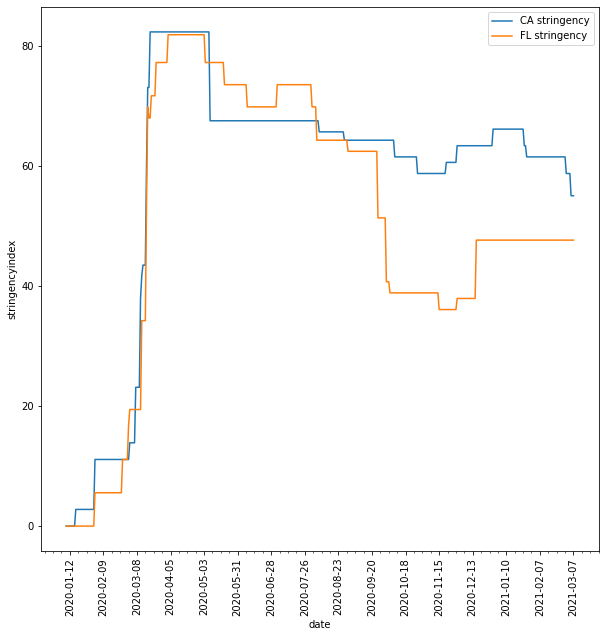

In [ ]:
t=0

non_neighbors = [('AZ','MI'),('NJ','WI'),('TX','NY'),('CA','FL')]

for s1,s2 in non_neighbors:
  df_s1 = inrange_us_stringency_df[inrange_us_stringency_df.state_code==s1]
  df_s2 = inrange_us_stringency_df[inrange_us_stringency_df.state_code==s2]
  
  f = plt.figure(t, figsize=(10, 10))
  
  ax = sb.lineplot(x="date", y="stringencyindex", 
                  data=df_s1, legend="full")

  ax = sb.lineplot(x="date", y="stringencyindex", 
                  data=df_s2, legend="full")

  ax.legend([s1 + " stringency", s2 + " stringency"])

  ax.xaxis.set_major_locator(ticker.MultipleLocator(28))
  ax.xaxis.set_minor_locator(ticker.MultipleLocator(7))
  ax.xaxis.set_tick_params(rotation=90)
  
  t+=1

### Form a DataFrame for systematic analysis of all states

##### States stringency difference

In [ ]:
state_average_stringency = inrange_us_stringency_df[["state_code", "stringencyindex", "governmentresponseindex"]] \
                                                  .groupby("state_code").mean()  
state_average_stringency

,stringencyindex,governmentresponseindex
state_code,,
AK,54.205425,52.756297
AL,44.172453,47.511840
AR,52.158184,51.771038
AZ,51.108396,50.088373
CA,58.042335,60.250354
CO,54.458750,53.534080
CT,60.258325,60.980425
DC,61.399906,57.450000
DE,57.244033,56.289009


**The average stringency between two states can be very similar, but their policies at each time point may be very different!** In order to show how similar the two states' stringency indexes are, we should calculate the average of absolute distance at each time point instead!

In [ ]:
pivoted_stringency_df = inrange_us_stringency_df.pivot(index="date", columns="state_code", values="stringencyindex")
pivoted_stringency_df

state_code,NaN,AK,AL,AR,AZ,CA,CO,CT,DC,DE,FL,GA,HI,IA,ID,IL,IN,KS,KY,LA,MA,MD,ME,MI,MN,MO,MS,MT,NC,ND,NE,NH,NJ,NM,NV,NY,OH,OK,OR,PA,RI,SC,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-01-09,0.00,5.56,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,5.56,0.0,0.00,0.00,0.00,1.39,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2020-01-10,0.00,5.56,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,5.56,0.0,0.00,0.00,0.00,1.39,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2020-01-11,0.00,5.56,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,5.56,0.0,0.00,0.00,0.00,1.39,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2020-01-12,0.00,5.56,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,5.56,0.0,0.00,0.00,0.00,1.39,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2020-01-13,0.00,5.56,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,5.56,0.0,0.00,0.00,0.00,1.39,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-03-03,68.06,55.09,46.3,50.0,61.11,58.80,57.87,62.04,61.11,51.85,47.69,51.85,76.85,43.52,50.0,58.33,50.93,54.17,58.33,62.5,69.44,56.02,55.56,61.11,57.41,54.17,43.52,50.0,64.81,39.81,47.22,49.07,54.63,66.2,58.33,63.43,54.63,46.3,61.11,43.52,59.26,39.81,41.67,57.87,53.7,39.81,54.63,69.44,62.96,56.02,50.93,61.11
2021-03-04,64.35,55.09,46.3,50.0,61.11,58.80,57.87,62.04,61.11,51.85,47.69,51.85,76.85,43.52,50.0,58.33,50.93,54.17,58.33,62.5,69.44,56.02,55.56,61.11,57.41,54.17,43.52,50.0,64.81,39.81,47.22,49.07,54.63,66.2,58.33,63.43,54.63,46.3,61.11,43.52,59.26,39.81,41.67,57.87,53.7,39.81,54.63,69.44,62.96,56.02,50.93,61.11
2021-03-05,64.35,55.09,46.3,50.0,57.41,55.09,57.87,62.04,61.11,51.85,47.69,51.85,76.85,43.52,50.0,58.33,50.93,54.17,58.33,62.5,69.44,56.02,55.56,61.11,57.41,54.17,43.52,50.0,64.81,39.81,47.22,49.07,54.63,66.2,58.33,61.57,54.63,46.3,61.11,43.52,59.26,39.81,41.67,57.87,53.7,39.81,54.63,69.44,62.96,56.02,50.93,61.11


In [ ]:
pivoted_stringency_df.reset_index(inplace=True)
pivoted_stringency_df

state_code,date,NaN,AK,AL,AR,AZ,CA,CO,CT,DC,DE,FL,GA,HI,IA,ID,IL,IN,KS,KY,LA,MA,MD,ME,MI,MN,MO,MS,MT,NC,ND,NE,NH,NJ,NM,NV,NY,OH,OK,OR,PA,RI,SC,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
0,2020-01-09,0.00,5.56,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,5.56,0.0,0.00,0.00,0.00,1.39,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,2020-01-10,0.00,5.56,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,5.56,0.0,0.00,0.00,0.00,1.39,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,2020-01-11,0.00,5.56,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,5.56,0.0,0.00,0.00,0.00,1.39,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,2020-01-12,0.00,5.56,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,5.56,0.0,0.00,0.00,0.00,1.39,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,2020-01-13,0.00,5.56,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,5.56,0.0,0.00,0.00,0.00,1.39,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
419,2021-03-03,68.06,55.09,46.3,50.0,61.11,58.80,57.87,62.04,61.11,51.85,47.69,51.85,76.85,43.52,50.0,58.33,50.93,54.17,58.33,62.5,69.44,56.02,55.56,61.11,57.41,54.17,43.52,50.0,64.81,39.81,47.22,49.07,54.63,66.2,58.33,63.43,54.63,46.3,61.11,43.52,59.26,39.81,41.67,57.87,53.7,39.81,54.63,69.44,62.96,56.02,50.93,61.11
420,2021-03-04,64.35,55.09,46.3,50.0,61.11,58.80,57.87,62.04,61.11,51.85,47.69,51.85,76.85,43.52,50.0,58.33,50.93,54.17,58.33,62.5,69.44,56.02,55.56,61.11,57.41,54.17,43.52,50.0,64.81,39.81,47.22,49.07,54.63,66.2,58.33,63.43,54.63,46.3,61.11,43.52,59.26,39.81,41.67,57.87,53.7,39.81,54.63,69.44,62.96,56.02,50.93,61.11
421,2021-03-05,64.35,55.09,46.3,50.0,57.41,55.09,57.87,62.04,61.11,51.85,47.69,51.85,76.85,43.52,50.0,58.33,50.93,54.17,58.33,62.5,69.44,56.02,55.56,61.11,57.41,54.17,43.52,50.0,64.81,39.81,47.22,49.07,54.63,66.2,58.33,61.57,54.63,46.3,61.11,43.52,59.26,39.81,41.67,57.87,53.7,39.81,54.63,69.44,62.96,56.02,50.93,61.11
422,2021-03-06,64.35,55.09,46.3,50.0,57.41,55.09,57.87,62.04,61.11,51.85,47.69,51.85,76.85,43.52,50.0,58.33,50.93,54.17,58.33,62.5,69.44,56.02,55.56,61.11,57.41,54.17,43.52,50.0,64.81,39.81,47.22,49.07,54.63,66.2,58.33,61.57,54.63,46.3,61.11,43.52,59.26,39.81,41.67,57.87,53.7,39.81,54.63,69.44,62.96,56.02,50.93,61.11


In [ ]:
state_code1 = "AK"
state_code2 = "AR"
(pivoted_stringency_df[state_code1] - pivoted_stringency_df[state_code2]).abs().mean()

6.273797169811334

In [ ]:
stringency_diff_dict = {"state_code_1":[], "state_code_2":[], "average_stringency_diff": []}
for i in range(len(state_code_all)):
  for j in range(i+1, len(state_code_all)): 
    state_code1 = state_code_all[i]
    state_code2 = state_code_all[j]
    stringency_diff_dict["state_code_1"].append(state_code1)
    stringency_diff_dict["state_code_2"].append(state_code2)
    stringency_diff_dict["average_stringency_diff"].append((pivoted_stringency_df[state_code1] - pivoted_stringency_df[state_code2]).abs().mean())

In [ ]:
states_diff_df = pd.DataFrame.from_dict(stringency_diff_dict)
states_diff_df

,state_code_1,state_code_2,average_stringency_diff
0,ME,NH,15.032264
1,ME,VT,9.780920
2,ME,MA,11.844080
3,ME,RI,7.286580
4,ME,CT,8.292311
...,...,...,...
1270,NV,AK,5.153160
1271,NV,HI,14.878373
1272,CA,AK,6.248325
1273,CA,HI,10.839434


##### Correlation in positive increase of cases for each pair of states

In [ ]:
cases_correlation_df = pd.read_excel("/content/drive/MyDrive/CZ1115introDSAI/Reproduction Rate/corr.xlsx", index_col=0)
cases_correlation_df

,AK,AL,AR,AS,AZ,CA,CO,CT,DC,DE,FL,GA,GU,HI,IA,ID,IL,IN,KS,KY,LA,MA,MD,ME,MI,MN,MO,MP,MS,MT,NC,ND,NE,NH,NJ,NM,NV,NY,OH,OK,OR,PA,PR,RI,SC,SD,TN,TX,UT,VA,VI,VT,WA,WI,WV,WY
AK,1.000000,0.613939,0.602089,NaN,0.474071,0.497976,0.889153,0.393983,0.466093,0.609591,0.488820,0.414715,0.397492,0.314014,0.747180,0.812379,0.861571,0.876544,0.427220,0.755458,0.372168,0.583488,0.672952,0.505865,0.732065,0.865259,0.829737,0.014014,0.588057,0.847794,0.564316,0.737660,0.839539,0.601805,0.600349,0.845328,0.770371,0.371307,0.802150,0.711971,0.794979,0.751926,0.608504,0.746587,0.430880,0.800454,0.664466,0.471862,0.832302,0.471926,0.176118,0.505273,0.590567,0.816112,0.706234,0.764827
AL,0.613939,1.000000,0.844457,NaN,0.754648,0.806371,0.663832,0.354569,0.572910,0.721108,0.740166,0.730115,0.082533,0.442445,0.462165,0.759714,0.644321,0.763272,0.369408,0.724090,0.605962,0.671334,0.789039,0.751379,0.436835,0.460247,0.683970,-0.002634,0.855324,0.572723,0.685849,0.305671,0.562811,0.678139,0.622238,0.711705,0.845623,0.569726,0.742445,0.710570,0.768249,0.816536,0.590154,0.753472,0.669675,0.411470,0.692154,0.738487,0.719585,0.733954,0.377889,0.581601,0.643830,0.565240,0.836804,0.448358
AR,0.602089,0.844457,1.000000,NaN,0.728825,0.747710,0.692025,0.354290,0.574385,0.716083,0.663173,0.689202,0.180387,0.455085,0.528301,0.752636,0.686136,0.771984,0.408523,0.725293,0.579442,0.655537,0.772352,0.750828,0.451100,0.488424,0.713389,-0.038571,0.823615,0.612230,0.649977,0.360143,0.642825,0.669480,0.639068,0.731197,0.795639,0.584679,0.711860,0.715641,0.767042,0.799025,0.570625,0.767743,0.639525,0.458799,0.628823,0.703862,0.722765,0.731280,0.255800,0.596457,0.660843,0.624526,0.841582,0.485504
AS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AZ,0.474071,0.754648,0.728825,NaN,1.000000,0.844890,0.547126,0.407519,0.608262,0.757532,0.749145,0.689413,-0.107648,0.327562,0.266736,0.553605,0.499275,0.651960,0.291566,0.678392,0.566986,0.692026,0.790453,0.721855,0.352638,0.346775,0.516010,-0.032491,0.758904,0.370625,0.722052,0.095478,0.439987,0.756442,0.644760,0.616572,0.782248,0.659968,0.714904,0.749589,0.742411,0.746596,0.483196,0.671960,0.764179,0.218922,0.634724,0.658500,0.619118,0.770753,0.242051,0.642731,0.541387,0.371380,0.805793,0.376766
CA,0.497976,0.806371,0.747710,NaN,0.844890,1.000000,0.544295,0.433768,0.698345,0.823719,0.731957,0.712852,-0.098100,0.430705,0.255642,0.584364,0.509687,0.700887,0.347631,0.698594,0.551760,0.760860,0.834633,0.806611,0.354602,0.343952,0.538791,-0.006061,0.810106,0.372167,0.747824,0.074227,0.419572,0.818522,0.684573,0.624160,0.802250,0.714697,0.716438,0.768515,0.794564,0.822366,0.602470,0.708431,0.773516,0.228521,0.749223,0.645137,0.625528,0.843169,0.293595,0.658086,0.590115,0.357728,0.871017,0.345061
CO,0.889153,0.663832,0.692025,NaN,0.547126,0.544295,1.000000,0.450888,0.559796,0.688031,0.469968,0.484390,0.332442,0.299930,0.801473,0.845934,0.947540,0.941607,0.464786,0.731701,0.409098,0.622307,0.769788,0.563744,0.764367,0.867844,0.860083,0.008660,0.644619,0.848763,0.517144,0.719339,0.904317,0.645670,0.718189,0.932738,0.813107,0.496706,0.810047,0.695849,0.837519,0.825827,0.610525,0.846607,0.432076,0.757512,0.618051,0.555616,0.827311,0.555281,0.170350,0.587971,0.689994,0.845020,0.786960,0.786928
CT,0.393983,0.354569,0.354290,NaN,0.407519,0.433768,0.450888,1.000000,0.354006,0.492923,0.351851,0.288786,0.060357,0.111229,0.214488,0.222376,0.422979,0.454192,0.640187,0.434677,0.240515,0.502791,0.472721,0.543045,0.625643,0.329365,0.308350,0.067141,0.339644,0.254032,0.351138,0.144498,0.349466,0.569631,0.475373,0.454236,0.398175,0.477035,0.518701,0.367687,0.455344,0.470287,0.314926,0.395469,0.294398,0.222212,0.437199,0.330224,0.430431,0.454775,0.025564,0.483861,0.304978,0.264452,0.439066,0.522930
DC,0.466093,0.572910,0.574385,NaN,0.608262,0.698345,0.559796,0.354006,1.000000,0.751

In [ ]:
cases_correlation_df["AL"].loc["AL"]

1.0

In [ ]:
states_diff_df["cases_corr"] = states_diff_df[["state_code_1", "state_code_2"]].apply(
    lambda x: cases_correlation_df[x["state_code_1"]].loc[x["state_code_2"]],
    axis=1)

In [ ]:
states_diff_df

,state_code_1,state_code_2,average_stringency_diff,cases_corr
0,ME,NH,15.032264,0.808029
1,ME,VT,9.780920,0.767926
2,ME,MA,11.844080,0.808514
3,ME,RI,7.286580,0.738244
4,ME,CT,8.292311,0.543045
...,...,...,...,...
1270,NV,AK,5.153160,0.770371
1271,NV,HI,14.878373,0.426451
1272,CA,AK,6.248325,0.497976
1273,CA,HI,10.839434,0.430705


In [ ]:
# check that the code above is correct. cases_corr between AK and AL should be 0.613939
states_diff_df[((states_diff_df["state_code_1"]=="AK") & (states_diff_df["state_code_2"]=="AL")) |
               ((states_diff_df["state_code_1"]=="AL") & (states_diff_df["state_code_2"]=="AK"))]

,state_code_1,state_code_2,average_stringency_diff,cases_corr
895,AL,AK,10.452075,0.613939


##### Whether two states are neighbors or not

Now that the correlation data is in, we shall put another column that indicate whether the two states are neighbors. 

In [ ]:
neighbor_df = pd.read_csv("/content/drive/MyDrive/CZ1115introDSAI/Reproduction Rate/neigh.csv", index_col=0)
neighbor_df

,first_state,second_state,code
0,AL,FL,Neigh
1,AL,GA,Neigh
2,AL,MS,Neigh
3,AL,TN,Neigh
4,AZ,CA,Neigh
...,...,...,...
2251,WY,VT,Non_N
2252,WY,VA,Non_N
2253,WY,WA,Non_N
2254,WY,WV,Non_N


**Note that if a pair of states are not in the table, they are non-neighbor**

In [ ]:
neighbor_df.rename(columns={"first_state": "state_code_1", "second_state": "state_code_2"}, inplace=True)
neighbor_df

,state_code_1,state_code_2,code
0,AL,FL,Neigh
1,AL,GA,Neigh
2,AL,MS,Neigh
3,AL,TN,Neigh
4,AZ,CA,Neigh
...,...,...,...
2251,WY,VT,Non_N
2252,WY,VA,Non_N
2253,WY,WA,Non_N
2254,WY,WV,Non_N


In [ ]:
# Alaska and Alabama are non-neighbors, but their entry is not in the table
neighbor_df[((neighbor_df["state_code_1"]=="AK") & (neighbor_df["state_code_2"]=="AL")) |
               ((neighbor_df["state_code_1"]=="AL") & (neighbor_df["state_code_2"]=="AK"))]

,state_code_1,state_code_2,code


In [ ]:
def decide_neighbor(x, neighbor_df):
  state_code_1 = x["state_code_1"]
  state_code_2 = x["state_code_2"]

  is_neighbor = neighbor_df[(neighbor_df['state_code_1']==state_code_1) &
              (neighbor_df['state_code_2']==state_code_2)]["code"]
  if len(is_neighbor) == 1:
    return is_neighbor.iloc[0]
  else:
    is_neighbor =  neighbor_df[(neighbor_df['state_code_2']==state_code_1) &
                               (neighbor_df['state_code_1']==state_code_2)]["code"]
    if len(is_neighbor) == 1:
      return is_neighbor.iloc[0]
    else:
      return "Non_N"

In [ ]:
states_diff_df["is_neighbor"] = states_diff_df[["state_code_1", "state_code_2"]].apply(
    lambda x: decide_neighbor(x, neighbor_df), axis=1)

In [ ]:
states_diff_df

,state_code_1,state_code_2,average_stringency_diff,cases_corr,is_neighbor
0,ME,NH,15.032264,0.808029,Neigh
1,ME,VT,9.780920,0.767926,Non_N
2,ME,MA,11.844080,0.808514,Non_N
3,ME,RI,7.286580,0.738244,Non_N
4,ME,CT,8.292311,0.543045,Non_N
...,...,...,...,...,...
1270,NV,AK,5.153160,0.770371,Non_N
1271,NV,HI,14.878373,0.426451,Non_N
1272,CA,AK,6.248325,0.497976,Non_N
1273,CA,HI,10.839434,0.430705,Non_N


##### The correlation in Rt across the two states

In [ ]:
inrange_df_rt_selected

,state,state_code,date,median,mean
0,Maine,ME,2020-03-02,1.347229,1.353815
1,Maine,ME,2020-03-03,1.339570,1.347466
2,Maine,ME,2020-03-04,1.336660,1.343113
3,Maine,ME,2020-03-05,1.334258,1.338407
4,Maine,ME,2020-03-06,1.329534,1.330090
...,...,...,...,...,...
19131,Wyoming,WY,2021-03-03,0.974120,0.975283
19132,Wyoming,WY,2021-03-04,0.975647,0.977035
19133,Wyoming,WY,2021-03-05,0.977437,0.978819
19134,Wyoming,WY,2021-03-06,0.979101,0.980623


In [ ]:
pivoted_rt_df = inrange_df_rt_selected.pivot(index="date", columns="state_code", values="median")
pivoted_rt_df

state_code,AK,AL,AR,AZ,CA,CO,CT,DC,DE,FL,GA,HI,IA,ID,IL,IN,KS,KY,LA,MA,MD,ME,MI,MN,MO,MS,MT,NC,ND,NE,NH,NJ,NM,NV,NY,OH,OK,OR,PA,RI,SC,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-01-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.291846,NaN,NaN,NaN
2020-01-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.294463,NaN,NaN,NaN
2020-01-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.294135,NaN,NaN,NaN
2020-01-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.299412,NaN,NaN,NaN
2020-01-13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.304104,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-03-03,1.010937,0.919037,0.847277,0.865160,0.891955,1.005663,1.022292,0.998077,1.005296,0.977627,0.848210,1.105320,0.988778,1.000300,1.018604,0.992426,0.923890,0.920483,0.940721,1.036488,1.057550,1.059378,1.186158,1.081084,1.079990,0.905471,0.970899,0.947732,1.046614,1.006976,1.014112,1.052273,0.930878,0.969024,1.005829,0.978606,0.923955,0.981364,1.039411,1.005360,0.918967,1.033400,0.950167,0.917237,0.938506,0.976533,1.033959,1.005061,0.985010,1.060919,0.974120
2021-03-04,1.012787,0.917523,0.847395,0.863100,0.894444,1.008430,1.027256,0.998073,1.007899,0.980775,0.856119,1.111049,0.991828,1.000276,1.024881,0.997766,0.929465,0.922843,0.945162,1.042643,1.062082,1.059375,1.192160,1.084588,1.035060,0.905133,0.972689,0.950854,1.052329,1.010769,1.021299,1.052543,0.934476,0.962501,1.008853,0.984166,0.929084,0.987086,1.046271,1.006827,0.924370,1.035052,0.951985,0.918525,0.940610,0.983127,1.036625,1.010003,0.989944,1.069453,0.975647
2021-03-05,1.014930,0.915442,0.848243,0.861725,0.897229,1.011301,1.031800,0.997619,1.010398,0.984184,0.867165,1.116568,0.994859,1.000434,1.031039,1.002839,0.934644,0.925091,0.948806,1.047869,1.066151,1.058944,1.197437,1.087827,0.990580,0.905162,0.974552,0.953994,1.058338,1.014495,1.028184,1.052842,0.938612,0.955247,1.012330,0.989818,0.934658,0.992981,1.052853,1.009000,0.929147,1.036836,0.953994,0.919874,0.942651,0.989424,1.039475,1.014103,0.994874,1.077102,0.977437


In [ ]:
rt_corr_df = pivoted_rt_df.corr()
rt_corr_df

state_code,AK,AL,AR,AZ,CA,CO,CT,DC,DE,FL,GA,HI,IA,ID,IL,IN,KS,KY,LA,MA,MD,ME,MI,MN,MO,MS,MT,NC,ND,NE,NH,NJ,NM,NV,NY,OH,OK,OR,PA,RI,SC,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
state_code,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
AK,1.000000,0.184541,0.350738,0.190565,0.168951,0.159149,-0.017325,-0.119816,-0.118782,0.237209,0.208843,0.600891,-0.011141,0.491216,0.003834,0.090227,-0.010122,0.083836,0.275192,0.044573,-0.068715,-0.060426,0.334134,-0.223589,0.257537,0.057888,0.909442,0.117728,0.210654,-0.078480,-0.020415,0.027953,0.198334,0.402257,0.064103,0.131615,0.291057,0.570336,0.076079,0.013255,0.294789,-0.032266,0.238575,0.133270,0.295105,-0.175749,0.380044,0.635570,0.251118,0.302242,0.601653
AL,0.184541,1.000000,0.879493,0.954715,0.962170,0.908801,0.905634,0.901604,0.846109,0.933477,0.964564,0.266758,0.845524,0.905584,0.906343,0.944755,0.889881,0.957967,0.956861,0.915345,0.935100,0.547270,0.650330,0.439730,0.939690,0.918744,0.323415,0.964179,0.769615,0.760786,0.820489,0.912317,0.876287,0.896940,0.864546,0.960920,0.935591,0.830529,0.942558,0.883023,0.949921,0.808604,0.964173,0.966406,0.936949,0.921604,0.536578,0.709068,0.866037,0.869170,0.655953
AR,0.350738,0.879493,1.000000,0.895128,0.891793,0.726955,0.715402,0.720906,0.681288,0.798032,0.847641,0.272231,0.729921,0.782333,0.732944,0.769891,0.796103,0.861507,0.817152,0.706086,0.736364,0.511400,0.447480,0.386722,0.788135,0.850694,0.423213,0.889950,0.599418,0.710424,0.681771,0.708976,0.828155,0.820230,0.656252,0.831105,0.880858,0.824434,0.743504,0.731477,0.899636,0.692057,0.857595,0.850264,0.851454,0.768024,0.398408,0.705276,0.769554,0.688008,0.664908
AZ,0.190565,0.954715,0.895128,1.000000,0.974007,0.927632,0.896624,0.889420,0.819110,0.964875,0.967517,0.311352,0.836587,0.877044,0.925167,0.938978,0.906037,0.940279,0.963882,0.875080,0.928860,0.571174,0.794621,0.521088,0.935344,0.920117,0.344487,0.978497,0.661777,0.757038,0.833816,0.932344,0.882993,0.951424,0.911812,0.961765,0.951891,0.911907,0.938923,0.878326,0.972392,0.749994,0.975774,0.964956,0.952508,0.903472,0.600081,0.862748,0.873915,0.750533,0.687451
CA,0.168951,0.962170,0.891793,0.974007,1.000000,0.937647,0.916041,0.925941,0.847390,0.951611,0.973577,0.313657,0.866265,0.884636,0.946001,0.952562,0.924048,0.962838,0.963294,0.896306,0.943405,0.633104,0.815610,0.592848,0.945950,0.922594,0.301024,0.977813,0.704820,0.804284,0.856418,0.938709,0.883297,0.939027,0.919910,0.977801,0.933006,0.896536,0.954378,0.903519,0.962233,0.791498,0.980867,0.970574,0.938443,0.928228,0.520571,0.850843,0.888622,0.812569,0.635572
CO,0.159149,0.908801,0.726955,0.927632,0.937647,1.000000,0.966154,0.946837,0.888763,0.943987,0.944559,0.264953,0.903329,0.884920,0.978449,0.976064,0.926279,0.935557,0.946800,0.957591,0.969043,0.540017,0.907478,0.656521,0.955776,0.823534,0.303562,0.921464,0.831412,0.814355,0.885874,0.977939,0.894893,0.918150,0.956048,0.971006,0.876306,0.860590,0.983262,0.946292,0.895156,0.806560,0.959491,0.947941,0.912244,0.918708,0.657028,0.862650,0.933555,0.805408,0.747652
CT,-0.017325,0.905634,0.715402,0.896624,0.916041,0.966154,1.000000,0.982846,0.942270,0.906074,0.928133,0.222512,0.941648,0.806325,0.967468,0.975437,0.934020,0.954751,0.914751,0.972388,0.987426,0.565147,0.818993,0.664601,0.946498,0.821744,0.155686,0.911592,0.847356,0.873933,0.932466,0.973328,0.913161,0.878392,0.915571,0.963955,0.860746,0.809914,0.978909,0.985303,0.864788,0.893583,0.926712,0.943532,0.879097,0.964746,0.624376,0.749530,0.877342,0.733187,0.681135
DC,-0.119816,0.901604,0.720906,0.889420,0.925941,0.946837,0.982846,1.000000,0.933726,0.882262,0.917287,0.145144,0.929563,0.764480,0.959701,0.961469,0.930793,0.957962,0.898248,0.955434,0.986339,0.597682,0.772178,0.695225,0.928245,0.844393,0.049913,0.911698,0.790600,0.890322,0.923956,0.951343,0.893299,0.842285,0.894502,0.955515,0.834167,0.774403,0.961859,0.978146,0.854407,0.867540,0.915520,0.937767,0.854524,0.982474,0.517767,0.716533,0.858446,0.702453,0.579063
DE,-0.118782,0.846109,0.681288,0.819110,0.847390,0.888763,0.9422

In [ ]:
rt_corr_df.to_csv("/content/drive/MyDrive/CZ1115introDSAI/Reproduction Rate/states_rt_corr.csv")

In [ ]:
states_diff_df["rt_corr"] = states_diff_df[["state_code_1", "state_code_2"]].apply(
    lambda x: rt_corr_df[x["state_code_1"]].loc[x["state_code_2"]],
    axis=1)

In [ ]:
states_diff_df

,state_code_1,state_code_2,average_stringency_diff,cases_corr,is_neighbor,rt_corr
0,ME,NH,15.032264,0.808029,Neigh,0.710979
1,ME,VT,9.780920,0.767926,Non_N,0.507486
2,ME,MA,11.844080,0.808514,Non_N,0.577435
3,ME,RI,7.286580,0.738244,Non_N,0.542157
4,ME,CT,8.292311,0.543045,Non_N,0.565147
...,...,...,...,...,...,...
1270,NV,AK,5.153160,0.770371,Non_N,0.402257
1271,NV,HI,14.878373,0.426451,Non_N,0.538085
1272,CA,AK,6.248325,0.497976,Non_N,0.168951
1273,CA,HI,10.839434,0.430705,Non_N,0.313657


In [ ]:
states_diff_df.to_csv("/content/drive/MyDrive/CZ1115introDSAI/Reproduction Rate/states_diff_summary.csv", index=False)

### Analysis of states

In [ ]:
import pandas as pd
import numpy as np
import datetime 
import matplotlib.pyplot as plt
import seaborn as sb

In [ ]:
states_diff_df = pd.read_csv("/content/drive/MyDrive/CZ1115introDSAI/Reproduction Rate/states_diff_summary.csv")

In [ ]:
states_diff_df

,state_code_1,state_code_2,average_stringency_diff,cases_corr,is_neighbor,rt_corr
0,ME,NH,15.032264,0.808029,Neigh,0.710979
1,ME,VT,9.780920,0.767926,Non_N,0.507486
2,ME,MA,11.844080,0.808514,Non_N,0.577435
3,ME,RI,7.286580,0.738244,Non_N,0.542157
4,ME,CT,8.292311,0.543045,Non_N,0.565147
...,...,...,...,...,...,...
1270,NV,AK,5.153160,0.770371,Non_N,0.402257
1271,NV,HI,14.878373,0.426451,Non_N,0.538085
1272,CA,AK,6.248325,0.497976,Non_N,0.168951
1273,CA,HI,10.839434,0.430705,Non_N,0.313657


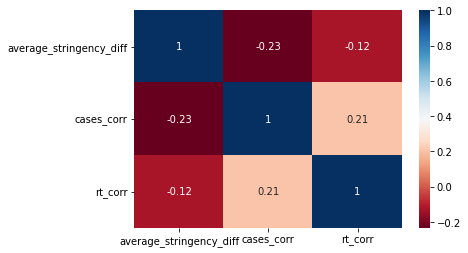

In [ ]:
sb.heatmap(states_diff_df[["average_stringency_diff", "cases_corr", "rt_corr"]].corr(), annot=True, cmap="RdBu")

In [ ]:
 def f(x):
  # Import essential models and functions from sklearn
  from sklearn.linear_model import LinearRegression
  from sklearn.model_selection import train_test_split
  from sklearn.metrics import mean_squared_error

  # Recall the Total-HP Dataset
  asd = pd.DataFrame(states_diff_df['average_stringency_diff'])   # Response
  rtc = pd.DataFrame(states_diff_df[x])         # Predictor

  # Split the Dataset into Train and Test
  X_train, X_test, y_train, y_test = train_test_split(cc, asd, test_size = 0.25)

  # Linear Regression using Train Data
  linreg = LinearRegression()         # create the linear regression object
  linreg.fit(X_train, y_train)        # train the linear regression model

  # Coefficients of the Linear Regression line
  print('Intercept of Regression \t: b = ', linreg.intercept_)
  print('Coefficients of Regression \t: a = ', linreg.coef_)
  print()

  # Predict Total values corresponding to HP
  y_train_pred = linreg.predict(X_train)
  y_test_pred = linreg.predict(X_test)

  # Check the Goodness of Fit (on Train Data)
  print("Goodness of Fit of Model \tTrain Dataset")
  print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
  print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
  print()

  # Check the Goodness of Fit (on Test Data)
  print("Goodness of Fit of Model \tTest Dataset")
  print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))
  print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
  print()

  # Plot the Predictions vs the True values
  plt.scatter(X_test, y_test, color="green")
  plt.scatter(X_test, y_test_pred, color="red")
  plt.show()

Intercept of Regression 	: b =  [11.68882026]
Coefficients of Regression 	: a =  [[-5.07730823]]

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.05147680909949259
Mean Squared Error (MSE) 	: 15.626822001243804

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.06373814825827662
Mean Squared Error (MSE) 	: 17.70308973313672



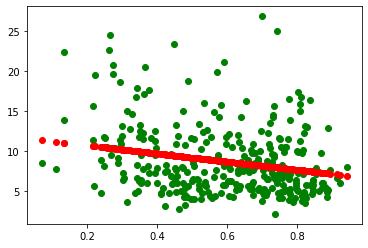

In [ ]:
f('rt_corr')

Intercept of Regression 	: b =  [12.02748391]
Coefficients of Regression 	: a =  [[-5.50631659]]

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.05927300995616058
Mean Squared Error (MSE) 	: 16.03383491406013

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.040093954690779365
Mean Squared Error (MSE) 	: 16.501418340982827



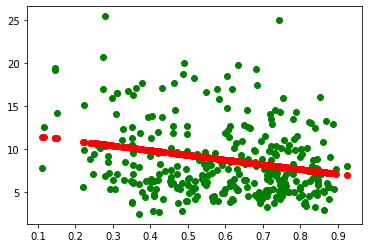

In [ ]:
f('cases_corr')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

[Text(0.5, 1.0, 'rt_corr of non-neighboring states')]

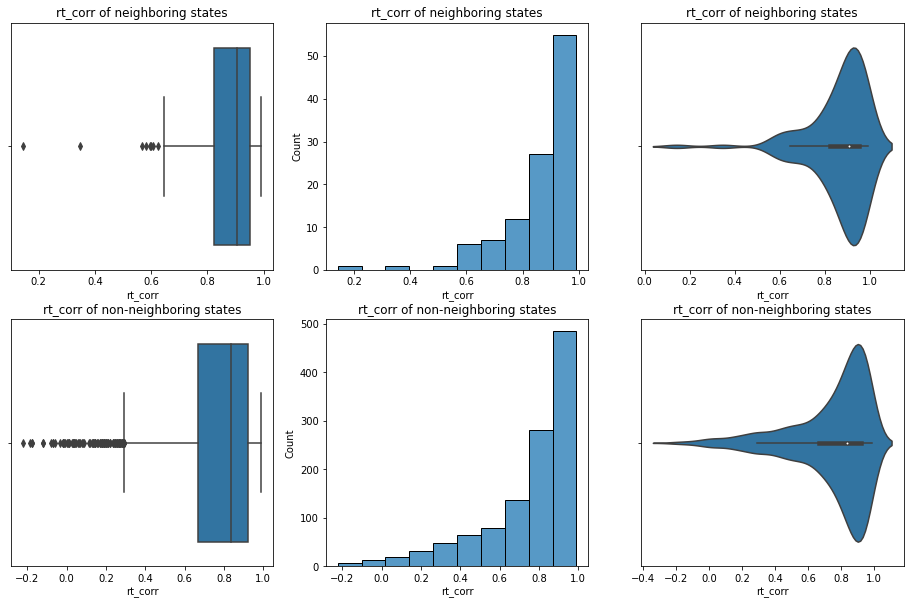

In [ ]:
f, axes = plt.subplots(2, 3, figsize=(16, 10))

neigh = states_diff_df[states_diff_df['is_neighbor']=='Neigh']
nonn = states_diff_df[states_diff_df['is_neighbor']!='Neigh']

sb.boxplot(neigh['rt_corr'], orient = "h", ax = axes[0,0]).set(title='rt_corr of neighboring states')
sb.histplot(neigh['rt_corr'], ax = axes[0,1],bins=10).set(title='rt_corr of neighboring states')
sb.violinplot(neigh['rt_corr'], orient = "h", ax = axes[0,2]).set(title='rt_corr of neighboring states')
sb.boxplot(nonn['rt_corr'], orient = "h", ax = axes[1,0]).set(title='rt_corr of non-neighboring states')
sb.histplot(nonn['rt_corr'], ax = axes[1,1],bins=10).set(title='rt_corr of non-neighboring states')
sb.violinplot(nonn['rt_corr'], orient = "h", ax = axes[1,2]).set(title='rt_corr of non-neighboring states')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

[Text(0.5, 1.0, 'cases_corr of non-neighboring states')]

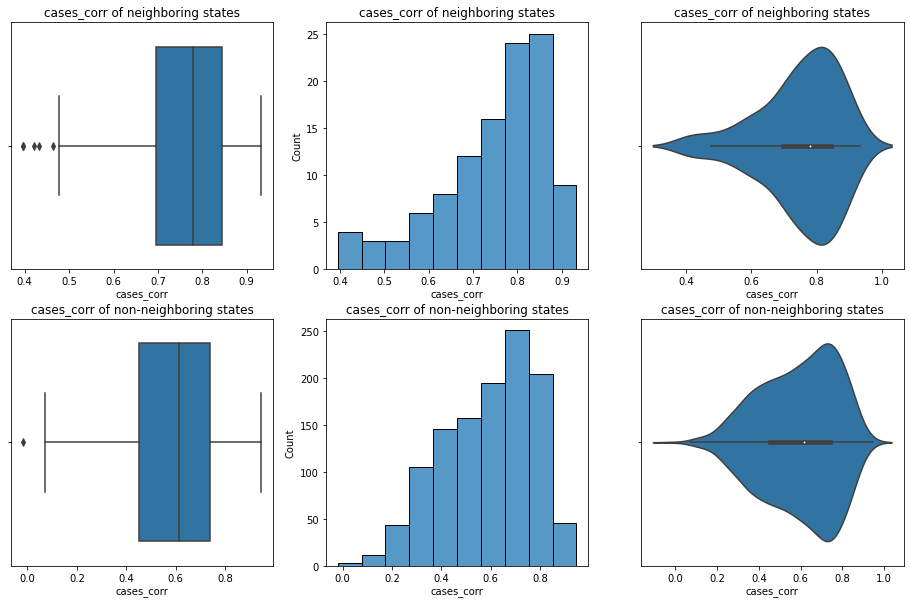

In [ ]:
f, axes = plt.subplots(2, 3, figsize=(16, 10))

neigh = states_diff_df[states_diff_df['is_neighbor']=='Neigh']
nonn = states_diff_df[states_diff_df['is_neighbor']!='Neigh']

sb.boxplot(neigh['cases_corr'], orient = "h", ax = axes[0,0]).set(title='cases_corr of neighboring states')
sb.histplot(neigh['cases_corr'], ax = axes[0,1],bins=10).set(title='cases_corr of neighboring states')
sb.violinplot(neigh['cases_corr'], orient = "h", ax = axes[0,2]).set(title='cases_corr of neighboring states')
sb.boxplot(nonn['cases_corr'], orient = "h", ax = axes[1,0]).set(title='cases_corr of non-neighboring states')
sb.histplot(nonn['cases_corr'], ax = axes[1,1],bins=10).set(title='cases_corr of non-neighboring states')
sb.violinplot(nonn['cases_corr'], orient = "h", ax = axes[1,2]).set(title='cases_corr of non-neighboring states')